In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="1" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model

def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
               )
    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 100    
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/simb' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/simb' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000):
    g = []
    for v in list_vertex:
        g.append(np.random.normal(mean,var,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))



In [4]:
bestMSE = []
bestBIC = []
bestCOMBO = []
averageDegree = []
targetDegree = []
target_inD = []
target_outD = []
descendants = []
t=0
while (t < 100):
    train_size = 40000
    nodes = 8
    test_mean = 1
    test_var = 2
    test_size = 4000
    
    G = random_dag(nodes, random.randint(nodes, nodes*nodes)) # since max number of edges is n^2
    df = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue
        
    known_conx = set({})
    for i in tetrad.getEdges():
        if ' --> ' in i:
            known_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
    known_conx
        
    # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    target = str(a.pop()[random.randint(0,1)])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    df_test = gen_data(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size)
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    #df.drop(df_test.index, inplace = True)
    #df_test.reset_index(inplace = True)
    #df.sample(frac= 1).reset_index(inplace = True) # this will shuffle and reset index

    x_test = df_test[inputs]
    y_test = df_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.2] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_absolute_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_absolute_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        if found_conx == known_conx:
            proposed.append(bic_pred)
        else:
            print("******Found an error")
            print(bic_pred, tetrad.getEdges())
            # for now just remove bad model.  Will need to add it to distance metric.
            proposed.append(bic_pred)
            #metrics = metrics[:-1]
            #generalization = generalization[:-1]
    nbest = 10
    print(proposed)
    total = normalize(metrics) + normalize(proposed)
    final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    descendants.append(len(nx.descendants(G, int(target[0]))))
    print(targetDegree, averageDegree)
    t += 1
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

A =  {('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('0', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('7', '4'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('0', '5')}
B =  {('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('0', '7'), ('4', '5'), ('2', '5'), ('7', '1'), ('3', '7'), ('0', '6'), ('7', '6'), ('4', '1'), ('3', '5'), ('7', '4'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('0', '5')}
A =  {('4', '0'), ('4', '6'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('0', '3'), ('2', '7'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('4', '7'), ('1'

******Found an error
-9679.24550921885 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-11031.805648521657 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-8682.009852946841 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-14423.886198986786 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-12190.158113857153 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-10635.829561388875 ['0 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-11116.08895509

******Found an error
-10697.022257826267 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-11338.634423668256 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-11298.992058034131 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-9821.141188423975 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-11288.206311357666 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-10250.798852472855 ['0 --> 1', '2 --> 1', '2 --> 3', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '7 --> 1', '6 --> 4', '6 --> 7']
******Found an error
-1

A =  {('5', '7'), ('6', '2'), ('4', '7'), ('5', '2'), ('1', '3'), ('6', '5'), ('6', '7'), ('4', '2'), ('0', '7'), ('0', '2'), ('4', '3'), ('4', '1'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '7'), ('1', '5'), ('4', '5'), ('3', '5'), ('6', '3')}
B =  {('6', '3'), ('6', '2'), ('6', '7'), ('6', '5'), ('1', '3'), ('4', '2'), ('0', '7'), ('0', '2'), ('4', '3'), ('4', '1'), ('4', '5'), ('5', '0'), ('1', '2'), ('1', '7'), ('1', '5'), ('5', '7'), ('6', '0'), ('3', '5'), ('4', '7')}
A =  {('7', '2'), ('6', '4'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('1', '0'), ('5', '3'), ('1', '3'), ('2', '5'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('0', '3'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '2'), ('6', '4'), ('2', '1'), ('5', '6'), ('5', '0'), ('1', '0'), ('5', '3'), ('1', '3'), ('2', '5'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('3'

******Found an error
-104214.95681694784 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104147.97710642616 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-103978.89357576225 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104022.54268519091 ['0 --> 

******Found an error
-104177.43442617424 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 2', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104081.77579293975 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104200.80182250505 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104187.769334287

******Found an error
-104236.6275190398 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104110.97555941108 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 2', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104085.24194878951 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104124.8613328732

******Found an error
-104207.14845170501 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-104199.9806937859 ['0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '5 --> 0', '0 --> 6', '1 --> 5', '2 --> 4', '1 --> 6', '3 --> 4', '7 --> 0', '5 --> 2', '5 --> 3', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
[-104102.6791469697, -104309.66425724901, -103997.25221292405, -104074.49356278863, -104073.26794184824, -104144.92693926179, -104087.36482429368, -103943.06826264974, -104107.33485156501, -104128.17052877691, -104089.13115318715, -104113.94370121275, -104185.07427633932, -104201.71866869634, -104105.67378461522, -104044.24228890246, -104278.6825528488, 

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('1', '7'), ('3', '7'), ('6', '1'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('0', '4'), ('0', '5'), ('5', '7')}
Inputs =  ['0', '1', '2', '3', '4', '5', '6']
Target =  ['7']
******Found an error
-81851.5618015878 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81655.47840005957 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2'

******Found an error
-81790.78979002198 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81753.1639473336 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81806.63708164007 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81704.10760871589 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '

******Found an error
-81647.66434564965 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81756.01148471063 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81702.37458996066 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81737.68193876182 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', 

******Found an error
-81688.01921354562 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81809.1545147283 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81656.8362108496 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5 --> 1', '6 --> 0', '0 --> 7', '3 --> 4', '5 --> 2', '6 --> 1', '1 --> 7', '6 --> 2', '7 --> 2', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-81716.44375500912 ['0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '4 --> 2', '5

A =  {('3', '7'), ('7', '2'), ('0', '5'), ('0', '7'), ('2', '4'), ('7', '6'), ('1', '5'), ('3', '4'), ('7', '4'), ('2', '6')}
B =  {('3', '7'), ('7', '2'), ('0', '5'), ('0', '7'), ('2', '4'), ('1', '5'), ('3', '4'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('2', '1'), ('1', '5'), ('4', '7'), ('1', '0'), ('4', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('2', '1'), ('1', '0'), ('4', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5'), ('4', '3'), ('2', '0')}
A =  {('2', '3'), ('6', '2'), ('3', '1'), ('3', '5'), ('7', '2'), ('7', '3'), ('6', '4'), ('0', '7'), ('0', '2'), ('2', '4'), ('7', '6')

A =  {('4', '0'), ('1', '0'), ('7', '0'), ('7', '2'), ('7', '5'), ('6', '5'), ('3', '2'), ('4', '7'), ('7', '6'), ('6', '0'), ('1', '7'), ('1', '5'), ('3', '6'), ('2', '6'), ('3', '5'), ('3', '0')}
B =  {('4', '0'), ('1', '0'), ('7', '0'), ('7', '5'), ('7', '2'), ('6', '5'), ('3', '2'), ('4', '7'), ('6', '0'), ('3', '0'), ('1', '7'), ('1', '5'), ('3', '5'), ('2', '6')}
A =  {('4', '0'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('1', '7'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('7', '0'), ('3', '4'), ('3', '0'), ('1', '6'), ('2', '0'), ('5', '7')}
B =  {('3', '2'), ('6', '4'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('6', '2'), ('1', '3'), ('1', '7'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('7', '0'), ('3', '0'), ('1', '6'), ('2', '0')}
A =  {('4', '6'), ('7', '2')

******Found an error
-104829.76874315129 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-105109.64294785619 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-103954.13005190084 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-103529.41724090313 ['1 --> 0', '2 --> 

******Found an error
-103293.54284476032 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-104408.66961705394 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-104796.39540889385 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-103107.76136097674 ['1 --> 

******Found an error
-103103.70105372569 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-102767.10085780986 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-104291.25552172237 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-103618.22828631544 ['1 --> 

******Found an error
-103124.33968364175 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-99957.20334792703 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-102126.75622951909 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '4 --> 0', '1 --> 4', '3 --> 2', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-104813.75608854466 ['1 --> 0

******Found an error
-29039.68955037302 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-27638.187672618726 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-29417.59807826135 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-25816.96210474232 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Foun

******Found an error
-27643.51255945527 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-27455.838491284743 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-26649.316017630452 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-29530.54876538665 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-29208.21544499926 ['

******Found an error
-29324.396037954724 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-29521.69965803191 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-28124.22101580013 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-28513.429487023386 ['1 --> 2', '3 --> 1', '4 --> 1', '3 --> 2', '1 --> 5', '2 --> 5', '6 --> 1', '7 --> 1', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-29367.564

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '3'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '5'), ('2', '7'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('6', '5'), ('2', '1'), ('6', '3'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('3', '5'), ('2', '7'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
A =  {('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('1', '0'), ('5', '3'), ('1', '3'), ('1', '7'), ('2', '6'), ('0', '6'), ('7', '6'), ('7', '0'), ('0', '3'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('1', '6'), ('1', '0'), ('4', '6'), ('0', '6'), ('2', '3'), ('2', '0'), ('5', '3'), ('1'

******Found an error
-189077.3929670051 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-188964.5773224029 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-188927.10613403202 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 

[-189023.31896713964, -188937.59624014294, -188807.16441534364, -188975.6258504112, -188896.16725166136, -188931.68344818367, -188923.25384041475, -188914.8682919304, -188842.7339395088, -188842.87225108314, -188961.3926054759, -188922.12114524242, -188951.3566281237, -188811.13592339167, -189077.3929670051, -188936.8847915581, -188970.67402118858, -188857.70936694715, -188964.5773224029, -188920.14632549553, -189055.20966474322, -188971.70986395757, -188967.42455025984, -188927.10613403202, -189111.62061283237, -189000.06482179827, -188953.67075809752, -189007.868408807, -189096.42205209637, -188915.38217790436, -189027.77880997476, -188956.53596283612, -188937.74026471577, -189056.2610086495, -188928.82857240044, -188979.0350030794, -188955.01682349126, -189022.5146764602, -188911.14151349032, -188991.14625229102, -188883.6279398334, -189005.98076604956, -188981.30721048685, -189037.81550493446, -188984.39279995218, -188963.21559205535, -189012.4866266786, -188962.12379406588, -18897

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5')}
A =  {('4', '6'), ('0', '2'), ('5', '6'), ('1', '5'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('6', '7'), ('4', '1'), ('3', '6'), ('0', '3'), ('1', '6'), ('2', '3'), ('0', '4'), ('0', '5'), ('4', '3'), ('5', '7')}
B =  {('2', '6'), ('1', '6'), ('3', '7'), ('0', '6'), ('2'

******Found an error
-148251.97140703403 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-146388.38676873743 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-149377.91939489418 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --

******Found an error
-149293.48706843986 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-142898.32972573774 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-153259.8474778804 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 -->

******Found an error
-146677.02296294263 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-146067.88848762104 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-148716.3060406941 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 -->

******Found an error
-145548.04436398734 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-146698.25336839745 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-150729.89221753282 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '0 --> 5', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '7 --> 0', '6 --> 1', '7 --> 1', '6 --> 2', '3 --> 5', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '0'), ('1', '2'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('7', '1'), ('3', '7'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '0'), ('1', '6'), ('2', '0')}
B =  {('7', '1'), ('1', '6'), ('1', '0'), ('3', '7'), ('4', '6'), ('6', '2'), ('3', '1'), ('6', '5'), ('7', '0'), ('4', '5'), ('7', '6'), ('4', '1'), ('6', '0'), ('1', '2'), ('2', '0'), ('3', '4'), ('2', '5'), ('3', '0')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('1', '0'), ('1', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('1', '0'), ('1', '3'), ('4', '5'), ('2', '5'), ('2'

A =  {('1', '6'), ('1', '0'), ('2', '7'), ('2', '3'), ('7', '5'), ('6', '7'), ('6', '5'), ('0', '5'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('7', '4'), ('1', '2'), ('1', '7'), ('1', '5'), ('3', '4'), ('2', '5'), ('3', '5'), ('3', '6')}
B =  {('1', '6'), ('1', '0'), ('2', '7'), ('2', '3'), ('7', '5'), ('6', '7'), ('6', '5'), ('0', '5'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('1', '2'), ('3', '6'), ('3', '4'), ('2', '5'), ('3', '5'), ('7', '4')}
A =  {('7', '1'), ('1', '6'), ('4', '6'), ('5', '1'), ('2', '3'), ('7', '2'), ('5', '3'), ('5', '2'), ('5', '7'), ('0', '4'), ('7', '3'), ('0', '5'), ('0', '7'), ('0', '2'), ('7', '6'), ('5', '6'), ('1', '2'), ('6', '3'), ('2', '6'), ('0', '3')}
B =  {('6', '3'), ('1', '6'), ('4', '6'), ('5', '1'), ('2', '3'), ('7', '1'), ('5', '3'), ('5', '2'), ('7', '2'), ('0', '4'), ('0', '5'), ('0', '7'), ('0', '2'), ('1', '2'), ('5', '7'), ('2', '6'), ('0', '3')}
A =  {('7', '1'), ('4', '0'), ('6', '1'), ('5', '1'), ('0', '6'), ('6', '2')

A =  {('4', '0'), ('1', '0'), ('1', '6'), ('7', '0'), ('6', '2'), ('3', '1'), ('5', '2'), ('7', '2'), ('3', '6'), ('3', '2'), ('6', '7'), ('6', '4'), ('4', '2'), ('7', '4'), ('5', '6'), ('2', '0'), ('1', '5'), ('5', '4'), ('3', '5'), ('3', '0')}
B =  {('1', '6'), ('1', '0'), ('4', '0'), ('7', '0'), ('3', '1'), ('6', '7'), ('3', '2'), ('6', '4'), ('4', '2'), ('5', '6'), ('2', '0'), ('1', '5'), ('5', '4'), ('7', '4')}
A =  {('7', '1'), ('1', '6'), ('7', '0'), ('7', '2'), ('6', '2'), ('3', '2'), ('0', '2'), ('0', '1'), ('1', '5'), ('5', '4')}
B =  {('1', '6'), ('7', '0'), ('6', '2'), ('3', '2'), ('0', '2'), ('0', '1'), ('1', '5'), ('5', '4')}
A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '1'), ('6', '7'), ('7', '0'), ('7', '4'), ('0', '3'), ('7', '5'), ('7', '3'), ('2', '4')}
B =  {('6', '1'), ('1', '0'), ('7', '5'), ('7', '2'), ('6', '2'), ('6', '7'), ('6'

A =  {('2', '3'), ('5', '3'), ('6', '7'), ('0', '4'), ('7', '3'), ('5', '6'), ('5', '0'), ('1', '7'), ('5', '4'), ('2', '5')}
B =  {('2', '3'), ('5', '3'), ('6', '7'), ('0', '4'), ('7', '3'), ('5', '6'), ('5', '0'), ('1', '7'), ('5', '4'), ('2', '5')}
Inputs =  ['0', '1', '2', '4', '5', '6', '7']
Target =  ['3']
******Found an error
-43169.705462533115 ['0 --> 4', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 6', '6 --> 7']
******Found an error
-42903.50622779861 ['0 --> 4', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 6', '6 --> 7']
******Found an error
-42539.44634535244 ['0 --> 4', '1 --> 3', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 6', '6 --> 7']
******Found an error
-41045.80612270153 ['0 --> 4', '1 --> 3', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 6', '6 --> 7']
******Found an 

******Found an error
-43193.63456371586 ['0 --> 4', '1 --> 3', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '7 --> 3', '5 --> 6', '6 --> 7']
******Found an error
-43244.60460119475 ['0 --> 4', '5 --> 0', '2 --> 3', '2 --> 5', '1 --> 7', '5 --> 3', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 6', '6 --> 7']
[-43199.37896613024, -43035.644740200485, -43169.705462533115, -42903.50622779861, -43064.91756540467, -43176.06568303994, -42539.44634535244, -41045.80612270153, -42993.89276390981, -43148.492642902085, -43230.52262154184, -42808.75441201251, -43037.00416477779, -42899.09351783743, -43249.25055251291, -42692.030062552614, -43162.94669086279, -43095.25980234341, -42624.28427938358, -42974.59865142332, -43189.3045110623, -43205.09052291266, -43171.51443992263, -42867.28280960892, -42762.69451233484, -42796.28655427366, -42971.558367489255, -43014.14953975788, -43101.41920442852, -42511.21605790554, -43015.10267309575, -42953.82311218888, -41093.3245247488, -42970.29329

A =  {('6', '5'), ('6', '4'), ('2', '1'), ('5', '4'), ('1', '4'), ('0', '7'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('6', '5'), ('6', '4'), ('2', '1'), ('5', '4'), ('1', '4'), ('0', '7'), ('0', '1'), ('2', '5'), ('7', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('1', '7'), ('6', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '0'), ('7', '3'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('7', '2'), ('6'

A =  {('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('6', '3'), ('5', '3'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('4', '1'), ('7', '0'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('6', '3'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('4', '1'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('6', '2'), ('5', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('7', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('4', '3')}
B =  {('7', '2'), ('6', '5'), ('0', '2'), ('1', '2'), ('1', '5'), ('6', '3'), ('1'

******Found an error
-198943.9080958503 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-198861.74737453702 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-198668.9824823715 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 

******Found an error
-198991.49250190245 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-199100.27509487417 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-198907.71842300505 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '3 --> 2', '0 --> 5', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '3 --> 4', '5 --> 2', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --

A =  {('7', '1'), ('6', '1'), ('4', '6'), ('5', '1'), ('7', '2'), ('6', '2'), ('3', '1'), ('5', '2'), ('5', '7'), ('7', '3'), ('3', '2'), ('0', '2'), ('7', '6'), ('6', '0'), ('0', '1'), ('1', '2'), ('5', '0'), ('7', '0'), ('6', '3'), ('7', '4')}
B =  {('7', '1'), ('4', '6'), ('5', '1'), ('7', '2'), ('3', '1'), ('5', '2'), ('7', '3'), ('3', '2'), ('0', '2'), ('7', '6'), ('6', '0'), ('0', '1'), ('1', '2'), ('5', '0'), ('5', '7'), ('7', '4'), ('6', '3')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '0'), ('5', '7')}
B =  {('4', '0'), ('6', '5'), ('3', '2'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('4', '7'), ('1', '0'), ('5', '3'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '1'), ('7'

******Found an error
-127072.45622289288 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-126521.51824969197 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-127452.89764755736 ['0 --> 1', '0 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-127802.80683367795 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 

******Found an error
-127462.43182201439 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '6 --> 7']
******Found an error
-128621.74870826538 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '6 --> 7']
******Found an error
-128454.33356824951 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '1 --> 5', '4 --> 2', '0 --> 7', '3 --> 4', '5 --> 2', '1 --> 7', '3 --> 5', '6 --> 2', '7 --> 2', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '6 --> 7']
******Found an error
-128636.07585854841 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 

A =  {('7', '1'), ('4', '0'), ('1', '6'), ('7', '0'), ('2', '7'), ('4', '6'), ('5', '3'), ('6', '5'), ('1', '3'), ('4', '3'), ('4', '5'), ('4', '1'), ('0', '1'), ('1', '5'), ('6', '3'), ('2', '5'), ('2', '6')}
B =  {('1', '6'), ('2', '7'), ('4', '0'), ('7', '0'), ('5', '3'), ('6', '5'), ('1', '3'), ('4', '1'), ('0', '1'), ('1', '5'), ('2', '5'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('7', '6'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7'

A =  {('6', '5'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('1', '7'), ('2', '5'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('3', '4'), ('7', '4'), ('0', '3'), ('2', '7'), ('2', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('6', '1'), ('5', '1'), ('6', '2'), ('2', '0'), ('5', '3'), ('1', '3'), ('6', '5'), ('6', '7'), ('2', '1'), ('2', '4'), ('6', '0'), ('5', '0'), ('1', '7'), ('3', '4'), ('2', '5'), ('7', '4'), ('0', '3')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '4'), ('3', '5'), ('0', '3'), ('0', '4'), ('5', '7')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('5', '2'), ('4'

A =  {('1', '6'), ('7', '0'), ('5', '3'), ('0', '4'), ('4', '3'), ('7', '6'), ('1', '5'), ('5', '4'), ('7', '4'), ('2', '6')}
B =  {('1', '6'), ('7', '0'), ('0', '4'), ('4', '3'), ('7', '6'), ('1', '5'), ('5', '4'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('4', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('4', '3'), ('2', '0')}
B =  {('7', '2'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('4', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('4', '3'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('0', '1')

A =  {('7', '0'), ('7', '5'), ('0', '6'), ('3', '2'), ('0', '5'), ('4', '5'), ('7', '6'), ('5', '6'), ('1', '7'), ('3', '4'), ('3', '6'), ('3', '5'), ('3', '0')}
B =  {('7', '0'), ('7', '5'), ('0', '6'), ('3', '2'), ('0', '5'), ('4', '5'), ('7', '6'), ('5', '6'), ('1', '7'), ('3', '4'), ('3', '6'), ('3', '0')}
A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('0', '3'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('7', '1'), ('3', '7'), ('4', '0'), ('5', '1'), ('2', '3'), ('6', '1'), ('6', '5'), ('6', '4'), ('2', '1'), ('4', '3'), ('6', '0'), ('0', '3'), ('5', '0'), ('2', '0'), ('6', '3'), ('5', '4'), ('2', '5'), ('2', '6')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1')

A =  {('4', '0'), ('6', '5'), ('6', '4'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('1', '7'), ('6', '1'), ('3', '7'), ('3', '1'), ('6', '7'), ('4', '1'), ('2', '7'), ('2', '3'), ('4', '3'), ('2', '4'), ('5', '7')}
B =  {('4', '0'), ('2', '7'), ('6', '1'), ('2', '3'), ('6', '2'), ('3', '1'), ('5', '3'), ('6', '5'), ('0', '7'), ('2', '4'), ('4', '3'), ('1', '7'), ('5', '4')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '3'), ('4', '7'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '5'), ('0', '3'), ('7', '5'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('6', '5'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '3'), ('4', '7'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '5'), ('0', '3'), ('7', '3'), ('0', '5'), ('4', '3')}
A =  {('4', '6'), ('0', '2')

******Found an error
-170801.23375723764 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '5 --> 4', '6 --> 3', '2 --> 7', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-170912.16699962693 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '5 --> 4', '6 --> 3', '2 --> 7', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-171404.87508691484 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '5 --> 4', '6 --> 3', '2 --> 7', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --

A =  {('6', '1'), ('2', '7'), ('5', '1'), ('6', '7'), ('6', '5'), ('0', '5'), ('0', '7'), ('2', '4'), ('6', '0'), ('0', '1'), ('5', '7')}
B =  {('2', '7'), ('5', '1'), ('0', '5'), ('0', '7'), ('2', '4'), ('6', '0'), ('0', '1'), ('5', '7')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('6', '1'), ('6', '7'), ('0', '3'), ('7', '4'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('6', '5'), ('6', '4'), ('6', '0'), ('1', '5'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('6', '1'), ('6', '7'), ('0', '3'), ('7', '4'), ('2', '7'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('7', '1')

******Found an error
-39804.13576702864 ['1 --> 0', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-37757.462538025786 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '1 --> 7', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-39796.137851179716 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-38051.97626576248 ['1 --> 0', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '1 --> 7', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-39944.94900811864 ['1 --> 0', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-34377.6014032085 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '5 --

******Found an error
-37718.91566238778 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '1 --> 7', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-39698.353010560204 ['0 --> 1', '4 --> 0', '3 --> 1', '4 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-37473.44648277029 ['1 --> 0', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '1 --> 7', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-39061.981723224766 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '5 --> 0', '4 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '7 --> 0', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-39745.894841665664 ['1 --> 0', '2 --> 1', '4 --> 0', '3 --> 1', '6 --> 0', '5 --> 1', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 6', '5 --> 6', '5 --> 7']
******Found an error
-40220.61173

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '7'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '0'), ('1', '6'), ('2', '0'), ('5', '7')}
B =  {('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '7'), ('3', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '4'), ('3', '0'), ('1', '6'), ('2', '0'), ('5', '7')}
A =  {('4', '6'), ('7', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('5', '3'), ('1', '3'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('7', '6'), ('3', '6'), ('7', '4'), ('2', '3'), ('7', '3'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('7', '1'), ('4', '6'), ('5', '1'), ('0', '6'), ('2', '3'), ('5', '3'), ('5', '2'), ('1', '3'), ('7', '2'), ('0', '5'), ('7', '4'), ('0', '2'), ('2', '4'), ('1'

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('1', '5'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '1'), ('3', '7'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('2', '1'), ('1', '5'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('6', '1'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '4'), ('2', '0')}
A =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '4'), ('6', '2'), ('5', '3'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('2', '4'), ('5', '7')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '4'), ('6', '2'), ('5', '3'), ('0'

******Found an error
-132670.83473842204 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132603.63567097386 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-131923.4676822655 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 -->

******Found an error
-132043.8353532936 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132446.3102984643 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132477.93791769174 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 

******Found an error
-132287.5183010806 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132272.67695949817 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-131837.17331636458 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 -->

******Found an error
-132659.81305602784 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132133.05840346124 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-132038.09089985656 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '4 --> 3', '0 --> 7', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --

******Found an error
-163227.50558806848 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163109.88600106986 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163037.01959012533 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --

******Found an error
-163208.82579660302 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163079.89667574284 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163284.75011149995 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --

******Found an error
-163099.8643066722 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163327.71754921039 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163307.89840323594 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 -->

******Found an error
-163034.87846990468 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163242.10048578144 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-163401.42973198608 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 6', '5 --> 6', '7 --> 4', '7 --

A =  {('4', '0'), ('4', '6'), ('5', '6'), ('5', '0'), ('4', '7'), ('1', '0'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '6'), ('5', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('0', '3'), ('2', '7'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('1', '0'), ('5', '1'), ('2', '3'), ('2', '0'), ('5', '3'), ('7', '3'), ('4', '7'), ('0', '7'), ('2', '4'), ('4', '5'), ('4', '1'), ('4', '3'), ('5', '6'), ('1', '7'), ('5', '7'), ('3', '6'), ('2', '6'), ('0', '3')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('1', '5'), ('1', '4'), ('6', '2'), ('4', '5'), ('0', '1'), ('7', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('6', '5'), ('3', '2'), ('6', '4'), ('1', '5'), ('1', '4'), ('4', '5'), ('0', '1'), ('7', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('7'

******Found an error
-143700.42490803121 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143778.75539484076 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-144072.41629392563 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --

******Found an error
-144090.13582374118 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143674.1966351315 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143661.625330845 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5

******Found an error
-144108.40665849092 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143861.25112227263 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143763.08663087696 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --

******Found an error
-144125.10592351327 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-143846.9243776368 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-144206.61204684788 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '5 --> 3', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 -->

A =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('7', '6'), ('4', '1'), ('3', '6'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('4', '3'), ('2', '4'), ('5', '7')}
B =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('5', '3'), ('1', '3'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('7', '6'), ('4', '1'), ('3', '6'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('4', '3'), ('2', '4'), ('5', '7')}
A =  {('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('5', '4'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('4', '6'), ('7', '2'), ('2', '1'), ('5'

A =  {('4', '0'), ('4', '6'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '0'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('2', '0')}
B =  {('4', '0'), ('3', '2'), ('6', '0'), ('5', '0'), ('4', '7'), ('0', '1'), ('2', '5'), ('2', '6'), ('3', '7'), ('6', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('2', '1'), ('6', '2'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('2', '1'), ('6', '2'), ('0', '1'), ('7', '1'), ('6'

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '0'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('3', '0'), ('7', '5')}
B =  {('7', '1'), ('3', '7'), ('1', '0'), ('5', '1'), ('7', '5'), ('6', '2'), ('3', '1'), ('5', '2'), ('6', '7'), ('7', '0'), ('3', '2'), ('7', '2'), ('6', '4'), ('4', '5'), ('4', '1'), ('5', '0'), ('3', '4'), ('3', '5'), ('7', '4')}
A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '7'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('4', '1'), ('0', '3'), ('2', '7'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '7'), ('0'

******Found an error
-53418.6929309275 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-53023.145225380365 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '7 --> 2', '6 --> 4']
******Found an error
-52175.161085906795 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '7 --> 2', '6 --> 4']
******Found an error
-53506.35547781351 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-53279.58424457743 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3

******Found an error
-53369.60269318042 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-53369.62356035246 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-53247.43592875726 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-52949.510225617705 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '3 --> 2', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6 --> 4']
******Found an error
-53582.21251432599 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 4', '0 --> 5', '1 --> 4', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '3 --> 5', '6 --> 2', '5 --> 4', '6

A =  {('4', '0'), ('2', '7'), ('3', '7'), ('2', '3'), ('5', '3'), ('6', '7'), ('6', '4'), ('4', '7'), ('0', '7'), ('2', '4'), ('4', '3'), ('6', '0'), ('5', '6'), ('2', '0'), ('1', '5'), ('5', '7'), ('2', '6'), ('1', '4'), ('0', '3')}
B =  {('3', '7'), ('2', '7'), ('4', '0'), ('5', '3'), ('6', '4'), ('4', '7'), ('0', '7'), ('2', '4'), ('6', '0'), ('5', '6'), ('0', '3'), ('2', '0'), ('1', '5'), ('1', '4'), ('2', '6')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('3', '6'), ('3', '5'), ('0', '3'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('4', '2'), ('3', '6'), ('0', '3'), ('7', '4'), ('7'

A =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('0', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('0', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('3', '7'), ('6', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
A =  {('7', '1'), ('6', '1'), ('7', '0'), ('7', '2'), ('6', '2'), ('3', '1'), ('6', '5'), ('0', '4'), ('6', '4'), ('2', '1'), ('7', '4'), ('6', '0'), ('3', '4'), ('6', '3'), ('3', '5'), ('3', '0')}
B =  {('7', '0'), ('7', '2'), ('6', '2'), ('3', '1'), ('0', '4'), ('6', '4'), ('2', '1'), ('3', '4'), ('6', '3'), ('3', '5'), ('3', '0')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2')

******Found an error
-154906.75852016517 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154831.99943113085 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154793.11130780051 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --

******Found an error
-154895.6642786994 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154893.88550784523 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154885.0585192945 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 

******Found an error
-154853.33828415148 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154989.3972721105 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154838.28974598445 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 -->

******Found an error
-154855.33347951347 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154816.18146434057 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-154816.25899945322 ['0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '0 --> 6', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '2 --> 6', '3 --> 6', '5 --> 4', '7 --> 2', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --

A =  {('3', '7'), ('2', '3'), ('0', '5'), ('1', '4'), ('3', '6'), ('5', '7'), ('2', '5'), ('3', '5')}
B =  {('3', '7'), ('2', '3'), ('3', '5'), ('0', '5'), ('3', '6'), ('5', '7'), ('2', '5'), ('1', '4')}
Inputs =  ['0', '1', '2', '3', '4', '5', '6']
Target =  ['7']
******Found an error
-42793.6812776278 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '5 --> 7']
******Found an error
-42100.34046120265 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42743.08542217332 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '1 --> 7', '3 --> 6', '3 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42856.81830440609 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42865.97723361903 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '0

******Found an error
-42665.28419176657 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42451.92492911342 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-43131.02908566407 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '1 --> 7', '3 --> 6', '2 --> 7', '3 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42915.30309658326 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42710.321407822164 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '2 --> 7', '3 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-42699.607460268184 ['0 --> 5', '1 --> 4', '2 --> 3', '2 --> 5', '3 --> 5', '3 --> 6', '3 --> 7', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
****

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '3'), ('1', '4'), ('6', '2'), ('6', '1'), ('3', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('3', '5'), ('7', '4'), ('0', '3'), ('7', '5'), ('0', '4'), ('0', '5')}
B =  {('3', '7'), ('6', '1'), ('7', '5'), ('0', '6'), ('6', '2'), ('6', '7'), ('3', '5'), ('5', '2'), ('0', '4'), ('3', '2'), ('6', '4'), ('0', '5'), ('4', '2'), ('0', '2'), ('7', '4'), ('3', '4'), ('6', '3'), ('1', '4'), ('0', '3')}
A =  {('6', '4'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('5', '3'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('7', '0'), ('7', '4'), ('2', '7'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('2', '7'), ('0', '6'), ('2', '0'), ('3', '1'), ('5', '3'), ('0', '4'), ('6', '4'), ('2', '1'), ('7', '6'), ('5', '0'), ('1', '7'), ('7', '0'), ('5', '7'), ('2', '5'), ('7', '4'), ('2', '6')}
A =  {('4', '0'), ('6', '4'), ('6', '0')

A =  {('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('0', '7'), ('4', '5'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('6', '2'), ('0', '7'), ('4', '5'), ('3', '7'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
A =  {('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('0', '3'), ('2', '7'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('6', '4'), ('2', '1'), ('0', '2'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '1'), ('1', '7'), ('2'

******Found an error
-110034.68662166952 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110318.00370130298 ['1 --> 0', '2 --> 0', '1 --> 2', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110483.4452417712 ['1 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110438.34099005445 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0

******Found an error
-109184.48159011843 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-109413.39661516258 ['1 --> 0', '2 --> 0', '1 --> 2', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-109808.40818305676 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110409.4603157807 ['1 --> 0', '2 --> 0', '1 --> 2', '1 --> 3', '4 --> 0

******Found an error
-110229.93147944237 ['1 --> 0', '2 --> 0', '1 --> 2', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110383.48300708635 ['1 --> 0', '2 --> 0', '1 --> 2', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110091.57381230613 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '2 --> 3', '5 --> 0', '0 --> 6', '1 --> 5', '1 --> 6', '2 --> 5', '3 --> 4', '7 --> 0', '1 --> 7', '2 --> 6', '5 --> 3', '5 --> 4', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-110283.21171854602 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('2', '3'), ('4', '3'), ('2', '4')}
B =  {('7', '1'), ('1', '6'), ('3', '7'), ('4', '0'), ('0', '6'), ('2', '3'), ('4', '6'), ('5', '1'), ('7', '5'), ('2', '1'), ('4', '7'), ('4', '3'), ('2', '4'), ('4', '5'), ('4', '1'), ('0', '1'), ('5', '0'), ('3', '6'), ('3', '5'), ('3', '0')}
A =  {('7', '0'), ('7', '2'), ('5', '7'), ('5', '3'), ('1', '3'), ('7', '3'), ('4', '7'), ('0', '2'), ('7', '6'), ('5', '6'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('2', '6')}
B =  {('6', '3'), ('7', '0'), ('7', '2'), ('5', '3'), ('1', '3'), ('4', '7'), ('0', '2'), ('7', '6'), ('5', '6'), ('1', '2'), ('1', '5'), ('5', '7'), ('1', '4'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '4'), ('4', '7')

A =  {('4', '0'), ('7', '2'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('7', '0'), ('3', '4'), ('3', '0'), ('7', '4'), ('7', '3'), ('2', '0')}
B =  {('6', '1'), ('1', '0'), ('5', '1'), ('7', '2'), ('3', '1'), ('5', '2'), ('6', '7'), ('7', '3'), ('3', '2'), ('4', '2'), ('1', '2'), ('2', '0'), ('7', '0'), ('5', '4'), ('1', '4')}
A =  {('2', '6'), ('1', '6'), ('1', '0'), ('3', '7'), ('7', '2'), ('7', '5'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '7'), ('5', '4'), ('7', '6'), ('1', '2'), ('1', '7'), ('1', '5'), ('3', '6'), ('2', '5'), ('3', '5'), ('3', '0')}
B =  {('1', '6'), ('1', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('0', '7'), ('3', '0'), ('1', '2'), ('3', '6'), ('1', '5'), ('5', '4'), ('2', '5'), ('3', '5'), ('2', '6')}
A =  {('4', '0'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('4', '7')

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('0', '2'), ('6', '0'), ('6', '3'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '7'), ('4', '2'), ('4', '1'), ('0', '3'), ('1', '6'), ('7', '3'), ('0', '5'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('0', '2'), ('6', '0'), ('6', '3'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '7'), ('4', '1'), ('0', '3'), ('1', '6'), ('7', '3'), ('0', '5'), ('4', '3'), ('5', '7')}
A =  {('7', '1'), ('2', '7'), ('4', '6'), ('2', '3'), ('5', '3'), ('5', '2'), ('1', '3'), ('7', '3'), ('6', '7'), ('4', '7'), ('4', '3'), ('4', '5'), ('4', '1'), ('5', '6'), ('0', '1'), ('7', '0'), ('5', '7'), ('0', '3')}
B =  {('2', '7'), ('4', '6'), ('2', '3'), ('6', '7'), ('5', '2'), ('1', '3'), ('4', '7'), ('4', '5'), ('4', '1'), ('5', '6'), ('0', '1'), ('7', '0'), ('0', '3')}
A =  {('4', '0'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '5')

******Found an error
-126521.51613078058 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126603.72602239855 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126496.45048050421 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --

******Found an error
-126729.62476133434 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126584.45479678288 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126494.27110978113 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --

******Found an error
-126876.12180435746 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126444.51313650965 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126414.88108335664 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --

******Found an error
-126664.32841755061 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126474.47847655513 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-126712.74147313605 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '4 --> 0', '4 --> 1', '0 --> 5', '2 --> 3', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('7', '1'), ('6', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '0'), ('5', '0'), ('1', '5'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('7', '1'), ('6', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '5'), ('2', '3'), ('7', '3')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('4', '7'), ('1', '0'), ('6', '2'), ('0', '7'), ('4', '5'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('5', '7')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6'

A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('5', '3'), ('2', '5'), ('7', '1'), ('6', '1'), ('7', '6'), ('3', '4'), ('7', '4'), ('7', '5'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('4', '0'), ('1', '0'), ('6', '1'), ('5', '3'), ('6', '5'), ('6', '4'), ('2', '1'), ('5', '4'), ('7', '6'), ('2', '0'), ('1', '5'), ('3', '4'), ('1', '4')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('6', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4'

A =  {('6', '1'), ('5', '1'), ('5', '7'), ('6', '2'), ('6', '7'), ('3', '5'), ('6', '5'), ('6', '4'), ('2', '1'), ('0', '7'), ('2', '4'), ('6', '0'), ('3', '4'), ('6', '3'), ('5', '4'), ('2', '5'), ('1', '4'), ('0', '3')}
B =  {('5', '1'), ('6', '2'), ('3', '5'), ('6', '5'), ('6', '4'), ('2', '1'), ('0', '7'), ('6', '0'), ('3', '4'), ('5', '7'), ('2', '5'), ('1', '4'), ('0', '3')}
A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '6'), ('3', '7'), ('0', '6'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '0'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '5'), ('4'

A =  {('7', '1'), ('4', '0'), ('1', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('3', '1'), ('4', '6'), ('7', '3'), ('0', '5'), ('4', '3'), ('4', '5'), ('7', '4'), ('4', '1'), ('7', '6'), ('3', '6'), ('1', '5'), ('2', '5'), ('3', '5'), ('3', '0')}
B =  {('7', '1'), ('1', '6'), ('1', '0'), ('4', '0'), ('4', '6'), ('7', '0'), ('3', '1'), ('7', '2'), ('0', '5'), ('4', '3'), ('1', '5'), ('2', '5'), ('3', '5'), ('7', '4')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('1', '5'), ('4', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('1', '5'), ('4', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '2'), ('3', '6'), ('0', '3'), ('1', '6'), ('2', '7'), ('7'

A =  {('7', '2'), ('6', '4'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('2', '5'), ('7', '1'), ('7', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('3', '0'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('1', '6'), ('7', '5'), ('7', '0'), ('2', '3'), ('7', '2'), ('0', '4'), ('2', '4'), ('7', '6'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('2', '0'), ('3', '4'), ('6', '3'), ('2', '5'), ('3', '0')}
A =  {('7', '0'), ('2', '7'), ('4', '6'), ('6', '5'), ('1', '3'), ('7', '3'), ('0', '5'), ('4', '2'), ('4', '3'), ('4', '5'), ('4', '1'), ('6', '0'), ('4', '7'), ('1', '2'), ('1', '7'), ('1', '5'), ('6', '3'), ('3', '5'), ('3', '0')}
B =  {('2', '7'), ('4', '6'), ('6', '5'), ('1', '3'), ('7', '3'), ('0', '5'), ('4', '7'), ('4', '2'), ('4', '1'), ('1', '2'), ('1', '7'), ('1', '5'), ('6', '3'), ('3', '5'), ('3', '0')}
A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3')

A =  {('1', '6'), ('2', '7'), ('6', '2'), ('3', '1'), ('5', '2'), ('6', '7'), ('0', '7'), ('6', '0'), ('5', '0'), ('2', '0'), ('3', '4'), ('5', '7'), ('3', '5'), ('3', '6')}
B =  {('1', '6'), ('6', '2'), ('3', '1'), ('5', '2'), ('6', '7'), ('0', '7'), ('2', '0'), ('3', '4'), ('3', '5')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('4', '7'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('3', '7'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5')}
B =  {('4', '0'), ('4', '6'), ('5', '6'), ('1', '2'), ('1', '5'), ('4', '7'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('3', '7'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '1'), ('3', '4'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5')}
A =  {('4', '0'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('4', '7')

******Found an error
-34667.98904545729 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7']
******Found an error
-35157.75739032778 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7']
******Found an error
-34898.258229685074 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7']
******Found an error
-34997.10267660054 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7']
******Found an error
-34660.53144909074 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-34767.87142455612 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7', '6 --> 2', '3 --> 5', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 7']
******Found an error
-35056.80630730083 ['3 --> 0', '0 --> 7', '5 --> 2', '1 --> 7

A =  {('4', '0'), ('6', '5'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '0'), ('2', '7'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('6', '5'), ('2', '1'), ('5', '0'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('3', '7'), ('6', '1'), ('5', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '0'), ('2', '7'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6'

A =  {('7', '1'), ('6', '1'), ('7', '5'), ('7', '2'), ('5', '3'), ('7', '3'), ('2', '1'), ('4', '2'), ('0', '7'), ('4', '1')}
B =  {('7', '1'), ('6', '1'), ('7', '5'), ('7', '2'), ('5', '3'), ('2', '1'), ('4', '2'), ('0', '7')}
A =  {('3', '2'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '0'), ('7', '4'), ('2', '7'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('3', '2'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('3', '7'), ('6', '1'), ('3', '1'), ('5', '2'), ('3', '6'), ('3', '4'), ('3', '0'), ('2', '7'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
A =  {('4', '0'), ('4', '6'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('6', '3'), ('1', '0'), ('5', '3'), ('4', '5')

A =  {('2', '7'), ('7', '0'), ('4', '6'), ('5', '7'), ('7', '3'), ('1', '2'), ('1', '5'), ('6', '3')}
B =  {('2', '7'), ('4', '6'), ('7', '0'), ('7', '3'), ('1', '2'), ('1', '5'), ('5', '7'), ('6', '3')}
Inputs =  ['0', '1', '3', '4', '5', '6', '7']
Target =  ['2']
******Found an error
-35860.431834976705 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35818.64527156333 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35735.577096477646 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35692.76536087098 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-34964.31546205914 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7', '6 --> 7']
******Found an error


******Found an error
-35700.550060725815 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35908.11441709272 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35662.83115353472 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35389.53773531184 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-35537.008063996014 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35783.26910684028 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******Found an error
-35840.93544125411 ['1 --> 2', '1 --> 5', '7 --> 0', '1 --> 7', '2 --> 7', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 7']
******F

A =  {('6', '5'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('1', '7'), ('2', '5'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '5'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('1', '7'), ('2', '5'), ('3', '7'), ('6', '1'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0'), ('5', '7')}
A =  {('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('2', '5'), ('7', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('4', '6'), ('3', '2'), ('1'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '0'), ('1', '5'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('7', '1'), ('3', '7'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '5'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('1', '5'), ('1', '0'), ('6', '2'), ('2', '5'), ('3', '7'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('7', '4'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('7', '6'), ('3', '6'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('1'

A =  {('4', '6'), ('3', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('3', '7'), ('5', '1'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '6'), ('0', '3'), ('2', '7'), ('4', '3'), ('5', '7')}
B =  {('4', '6'), ('3', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('3', '7'), ('5', '1'), ('0', '6'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('0', '3'), ('2', '7'), ('4', '3'), ('5', '7')}
A =  {('7', '1'), ('4', '0'), ('1', '0'), ('6', '1'), ('7', '0'), ('7', '5'), ('6', '5'), ('7', '3'), ('0', '5'), ('4', '7'), ('4', '5'), ('7', '6'), ('6', '0'), ('2', '0'), ('1', '5'), ('3', '6'), ('2', '5'), ('2', '6')}
B =  {('7', '1'), ('4', '0'), ('1', '0'), ('6', '1'), ('2', '0'), ('7', '3'), ('0', '5'), ('4', '7'), ('3', '6'), ('2', '6')}
A =  {('4', '6'), ('2', '1'), ('5', '6'), ('5', '0')

A =  {('4', '0'), ('6', '1'), ('7', '0'), ('7', '2'), ('3', '7'), ('7', '5'), ('5', '2'), ('6', '7'), ('6', '4'), ('0', '5'), ('4', '2'), ('0', '2'), ('4', '3'), ('6', '0'), ('4', '5'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('4', '7')}
B =  {('3', '7'), ('4', '0'), ('6', '1'), ('7', '2'), ('7', '0'), ('6', '7'), ('5', '2'), ('6', '4'), ('0', '5'), ('4', '3'), ('0', '2'), ('1', '2'), ('1', '5'), ('1', '4'), ('4', '7')}
A =  {('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('1', '5'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('0', '4'), ('0', '5'), ('2', '4')}
B =  {('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('1', '5'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '6'), ('7', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7'

A =  {('7', '1'), ('1', '6'), ('4', '6'), ('7', '5'), ('0', '6'), ('6', '2'), ('7', '2'), ('5', '2'), ('6', '5'), ('0', '5'), ('7', '6')}
B =  {('7', '1'), ('1', '6'), ('4', '6'), ('7', '5'), ('0', '6'), ('5', '2'), ('6', '5'), ('0', '5')}
A =  {('3', '7'), ('2', '7'), ('6', '7'), ('6', '5'), ('0', '7'), ('2', '4'), ('2', '0'), ('1', '5'), ('5', '7'), ('7', '4'), ('3', '6')}
B =  {('3', '7'), ('2', '7'), ('6', '7'), ('6', '5'), ('0', '7'), ('2', '4'), ('2', '0'), ('1', '5'), ('5', '7'), ('7', '4'), ('3', '6')}
Inputs =  ['0', '1', '2', '3', '4', '5', '6']
Target =  ['7']
******Found an error
-27094.44551418115 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-27340.352870270734 ['2 --> 0', '0 --> 4', '1 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7'

******Found an error
-27395.290435337327 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-26410.905237364743 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-26665.460175689343 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-28130.570785264616 ['2 --> 0', '0 --> 4', '1 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-28302.379944233664 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4'

******Found an error
-26540.0140204736 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-28214.24195479465 ['2 --> 0', '0 --> 4', '1 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-27405.377881822 ['2 --> 0', '0 --> 4', '1 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-26830.14751387015 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-26096.66312492393 ['2 --> 0', '0 --> 4', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '3 --> 6', '2 --> 7', '5 --> 4', '3 --> 7', '6 -->

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '3'), ('0', '7'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('6', '7'), ('4', '2'), ('4', '1'), ('1', '6'), ('2', '7'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('6', '3'), ('1', '6'), ('2', '7'), ('3', '7'), ('4', '6'), ('4', '0'), ('2', '0'), ('6', '7'), ('1', '3'), ('2', '1'), ('4', '2'), ('0', '7'), ('4', '3'), ('5', '6'), ('0', '1'), ('1', '7'), ('1', '5'), ('5', '7'), ('2', '5'), ('4', '7')}
A =  {('2', '1'), ('5', '6'), ('5', '4'), ('0', '7'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('7', '4'), ('2', '7'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('2', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('0', '4'), ('2', '1'), ('0', '5'), ('0', '7'), ('5', '4'), ('7', '4'), ('4', '1'), ('5', '6'), ('0', '1'), ('2', '0'), ('3'

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('7', '3')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('7', '3')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('1', '4'), ('1', '0'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '1'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('6'

A =  {('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('6', '2'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('0', '4'), ('5', '7')}
B =  {('7', '1'), ('6', '1'), ('7', '0'), ('5', '1'), ('7', '2'), ('6', '2'), ('3', '1'), ('6', '7'), ('0', '4'), ('3', '2'), ('0', '2'), ('4', '1'), ('5', '6'), ('5', '0'), ('1', '2'), ('3', '4'), ('5', '7'), ('3', '5')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '4'), ('1', '0'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '6'), ('0', '6'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '4'), ('1', '0'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '6'), ('0', '6'), ('4', '2'), ('7', '6'), ('3', '6'), ('7'

******Found an error
-4618.962639990859 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4867.822515085398 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '3 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4422.390865947561 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4475.9076727681395 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4348.7444654708515 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-5185.984939106644 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '3 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4488.567916553198 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 

******Found an error
-3997.1518534551974 ['2 --> 1', '3 --> 0', '3 --> 1', '1 --> 4', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4531.25429662761 ['2 --> 1', '3 --> 0', '3 --> 1', '1 --> 4', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-5365.815900926894 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '5 --> 4', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-4787.92824327266 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '7 --> 1', '7 --> 2', '5 --> 4', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-3636.4475467984275 ['2 --> 1', '3 --> 0', '3 --> 1', '2 --> 4', '3 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-3733.400257674029 ['2 --> 1', '3 --> 0', '3 --> 1', '1 --> 4', '2 --> 4', '7 --> 1', '7 --> 2', '6 --> 4', '7 --> 4', '5 --> 6']
******Found an error
-5334.831622759394 ['2 --> 1', '3 --> 0', '3 --> 1', '0 --> 4', '2 --> 4'

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '3'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('6', '7'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '3'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('4', '3'), ('2', '4'), ('5', '7')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('4', '7'), ('1', '0'), ('6', '2'), ('0', '7'), ('4', '5'), ('1', '7'), ('6', '1'), ('3', '7'), ('3', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('2', '7'), ('4', '3'), ('5', '7')}
B =  {('6', '5'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('4', '7'), ('1', '0'), ('0'

******Found an error
-101985.0618559797 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-101991.50056846016 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-101974.38528965075 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 -->

******Found an error
-102002.35024265446 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-101974.58140510267 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-102123.98392487036 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --

******Found an error
-102055.34180458209 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-102121.36520730314 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-101843.50701169665 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --

******Found an error
-101981.9458400213 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-101878.00756559707 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-102036.02186168592 ['0 --> 1', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '2 --> 5', '4 --> 3', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 -->

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('0', '3'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('6', '2'), ('0', '7'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('7', '4'), ('0', '3'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
A =  {('4', '0'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '1'), ('3', '7'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '4'), ('3', '0'), ('0', '5'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '3'), ('3', '7'), ('1', '0'), ('6', '1'), ('2', '0'), ('3', '1'), ('6', '5'), ('3'

A =  {('1', '6'), ('4', '6'), ('3', '7'), ('0', '6'), ('6', '2'), ('3', '1'), ('7', '2'), ('0', '4'), ('0', '5'), ('0', '7'), ('4', '7'), ('7', '6'), ('4', '1'), ('5', '6'), ('1', '7'), ('5', '7'), ('3', '6'), ('0', '3')}
B =  {('1', '6'), ('0', '6'), ('6', '2'), ('3', '1'), ('0', '4'), ('0', '5'), ('0', '7'), ('7', '6'), ('4', '1'), ('5', '6'), ('1', '7'), ('5', '7'), ('0', '3')}
A =  {('7', '2'), ('6', '4'), ('6', '0'), ('5', '6'), ('1', '5'), ('1', '4'), ('1', '0'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '1'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('1', '6'), ('1', '0'), ('7', '0'), ('7', '2'), ('3', '1'), ('0', '4'), ('7', '3'), ('7', '6'), ('6', '0'), ('5', '6'), ('2', '0'), ('1', '5'), ('3', '4'), ('2', '5'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4')

A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('1', '0'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('6', '7'), ('4', '1'), ('7', '0'), ('3', '4'), ('7', '4'), ('3', '0'), ('2', '7'), ('7', '5'), ('2', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('3', '7'), ('2', '7'), ('1', '0'), ('2', '3'), ('4', '0'), ('6', '1'), ('6', '7'), ('6', '5'), ('6', '2'), ('7', '0'), ('2', '1'), ('2', '4'), ('4', '5'), ('4', '1'), ('5', '0'), ('3', '4'), ('6', '3'), ('7', '4'), ('3', '0')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('4', '7'), ('6', '2'), ('1', '3'), ('3', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('1', '6'), ('3', '7'), ('7', '2'), ('6', '2'), ('1', '3'), ('0', '4'), ('3', '2'), ('6', '4'), ('0', '5'), ('4', '7'), ('0', '2'), ('4', '2'), ('6', '0'), ('1', '2'), ('3'

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('0', '7'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '4'), ('0', '7'), ('0', '1'), ('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '4'), ('0', '5'), ('5', '7')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('1', '0'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('7', '3'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4'

A =  {('3', '7'), ('4', '6'), ('5', '1'), ('2', '3'), ('5', '3'), ('5', '2'), ('2', '1'), ('4', '7'), ('0', '7'), ('2', '4'), ('5', '6'), ('5', '0'), ('3', '4'), ('5', '7'), ('5', '4'), ('2', '6'), ('3', '0')}
B =  {('3', '7'), ('4', '6'), ('5', '1'), ('2', '3'), ('5', '2'), ('2', '1'), ('4', '7'), ('0', '7'), ('2', '4'), ('5', '6'), ('3', '0'), ('5', '0'), ('3', '4'), ('5', '4'), ('2', '6')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('7'

******Found an error
-137485.18561012414 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137376.14924381505 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137418.38944652205 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137368.5326259028 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0

******Found an error
-137102.61937538968 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137431.1207054673 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137431.44432899982 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137372.97830996 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', 

******Found an error
-137315.3802064506 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137319.83522828008 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137288.8714572218 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4', '2 --> 3', '5 --> 0', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '3 --> 5', '2 --> 7', '3 --> 6', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137488.28272085867 ['1 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '1 --> 4'

A =  {('4', '0'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('4', '7'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('3', '7'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('6', '5'), ('3', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('4', '7'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('3', '7'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('1', '6'), ('2', '7'), ('7', '5'), ('0', '5'), ('2', '4'), ('2', '0')}
A =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('7', '6'), ('3', '6'), ('3', '5'), ('7', '4'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4')}
B =  {('2', '1'), ('0', '2'), ('5', '6'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2'

A =  {('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('5', '3'), ('1', '3'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('2', '7'), ('2', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('4', '6'), ('7', '0'), ('0', '6'), ('2', '3'), ('2', '0'), ('5', '3'), ('1', '3'), ('2', '1'), ('7', '4'), ('5', '4'), ('7', '6'), ('5', '6'), ('5', '0'), ('1', '7'), ('3', '4'), ('3', '6'), ('2', '5'), ('1', '4'), ('2', '6')}
A =  {('4', '6'), ('7', '2'), ('2', '1'), ('4', '7'), ('5', '3'), ('0', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('0', '3'), ('1', '6'), ('7', '5'), ('7', '3'), ('0', '5')}
B =  {('2', '6'), ('1', '6'), ('4', '6'), ('5', '1'), ('7', '2'), ('3', '1'), ('5', '3'), ('7', '3'), ('2', '1'), ('0', '5'), ('0', '7'), ('4', '2'), ('4', '7'), ('4', '1'), ('7', '6'), ('2', '5'), ('0', '3')}
A = 

[-118756.21982051406, -118704.60828848873, -118714.90025292616, -118761.94619714863, -118671.84034009438, -118780.40500809264, -118671.41702803675, -118598.7261556804, -118624.47300275351, -118672.10826267164, -118804.81786044933, -118573.34050931718, -118565.07320441413, -118659.98770489755, -118717.02764173764, -118556.88766417146, -118588.20967242085, -118869.81101079177, -118676.94201190687, -118635.40843350519, -118511.25104010747, -118647.82613253666, -118667.2906986604, -118566.97755359532, -118798.74535131325, -118520.48817542887, -118642.16577456002, -118577.4623982654, -118679.33523542083, -118755.41640328888, -118761.16152954997, -118556.84351668294, -118620.86888035957, -118540.78823671135, -118453.08969975464, -118767.84210778291, -118758.81983108004, -118552.09794695652, -118561.91524251374, -118601.29208524394, -118681.10965105912, -118632.03532565472, -118642.20925345941, -118572.22133374204, -118667.49539917108, -118638.32752060282, -118439.94141875878, -118695.5469020

A =  {('7', '1'), ('1', '6'), ('7', '5'), ('7', '2'), ('5', '3'), ('6', '5'), ('0', '4'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('7', '6'), ('1', '5'), ('6', '3'), ('2', '5'), ('7', '4')}
B =  {('7', '1'), ('1', '6'), ('7', '5'), ('7', '2'), ('5', '3'), ('6', '5'), ('0', '4'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('7', '6'), ('1', '5'), ('2', '5')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('7', '1'), ('6', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('7', '1'), ('6', '1'), ('6', '7'), ('5', '2'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('7'

******Found an error
-32633.368018188427 ['0 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32447.929911321033 ['0 --> 3', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32628.988736676358 ['0 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32733.12376664423 ['0 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32404.789806853783 ['0 --> 3', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32577.902884412157 ['0 --> 3', '0 --> 5', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32384.401693089127 ['0 --> 3', '0 --> 5', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5']
******Found an error
-32245.39441132

******Found an error
-32086.780507644202 ['0 --> 3', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5']
******Found an error
-32437.955698055724 ['0 --> 3', '0 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32611.897379204907 ['0 --> 3', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5']
******Found an error
-32090.564619094956 ['0 --> 3', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32478.736215993875 ['0 --> 3', '0 --> 5', '1 --> 5', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
******Found an error
-32822.925928719844 ['0 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '4 --> 5', '4 --> 7', '6 --> 5', '7 --> 5']
[-32044.895653066236, -32342.419657119353, -32317.87914876557, -32635.737816538127, -32487.989175417963, -32449.622628313995, -32686.953994368694, -32445.621424822213, -32524.7

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('6', '7'), ('3', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('7', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('6', '7'), ('3', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '4'), ('0', '3'), ('2', '7'), ('2', '3'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('0'

A =  {('0', '6'), ('3', '1'), ('6', '7'), ('0', '4'), ('3', '2'), ('6', '4'), ('4', '7'), ('5', '4'), ('2', '4'), ('5', '6'), ('5', '0'), ('1', '2'), ('3', '6'), ('1', '5'), ('5', '7'), ('3', '4'), ('3', '5'), ('3', '0')}
B =  {('0', '6'), ('3', '1'), ('0', '4'), ('6', '4'), ('4', '7'), ('2', '4'), ('5', '0'), ('1', '2'), ('1', '5'), ('5', '4'), ('3', '0')}
A =  {('7', '2'), ('6', '5'), ('6', '4'), ('6', '0'), ('1', '5'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('2', '5'), ('3', '7'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('7', '2'), ('6', '5'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('2', '5'), ('3', '7'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('0', '4'), ('0', '5'), ('2', '4'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('5', '6'), ('5', '0'), ('4', '7'), ('1', '0')

******Found an error
-139346.71437008638 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-139484.67282530892 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-139378.09399872454 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an e

******Found an error
-139655.94502126577 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-139472.8397432109 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-139583.70116594335 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an er

A =  {('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '0'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '7'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '1'), ('0', '3'), ('2', '7'), ('0', '4'), ('4', '3'), ('2', '4'), ('5', '7')}
B =  {('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '0'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '7'), ('2', '6'), ('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '1'), ('0', '3'), ('2', '7'), ('0', '4'), ('4', '3'), ('2', '4'), ('5', '7')}
A =  {('4', '0'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '0'), ('7', '4'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('2', '1'), ('6', '0'), ('5', '0'), ('6'

******Found an error
-142972.3151262507 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-142889.8006255693 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-142571.02271845474 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 

******Found an error
-142799.0062715717 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-142767.74518023047 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-142878.7570717446 ['0 --> 1', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 4', '5 --> 0', '2 --> 3', '4 --> 1', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '7 --> 0', '2 --> 5', '6 --> 1', '5 --> 3', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 

A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('6', '7'), ('7', '0'), ('0', '3'), ('7', '4'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '5'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '1'), ('2', '5'), ('7', '1'), ('5', '1'), ('6', '7'), ('7', '0'), ('0', '3'), ('7', '4'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '3'), ('5', '3'), ('1', '3'), ('4', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('0', '6'), ('6', '7'), ('4', '1'), ('7', '4'), ('0', '3'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4')}
B =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '3'), ('5', '3'), ('1', '3'), ('4', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('6'

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('3', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5'), ('4', '3')}
B =  {('4', '0'), ('6', '5'), ('3', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '1'), ('3', '0'), ('1', '6'), ('7', '5'), ('0', '5'), ('4', '3')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('6', '7'), ('7', '0'), ('3', '4'), ('0', '3'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('6', '4'), ('2', '1'), ('6', '0'), ('1', '4'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('6'

******Found an error
-94885.70614701456 ['0 --> 1', '2 --> 1', '0 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '0 --> 6', '2 --> 4', '0 --> 7', '4 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-95908.53836696381 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '0 --> 6', '2 --> 4', '0 --> 7', '4 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-95999.11192134385 ['0 --> 1', '2 --> 1', '0 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '0 --> 6', '2 --> 4', '0 --> 7', '4 --> 3', '2 --> 5', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-96156.11919601394 ['0 --> 1', '2 --> 1', '0 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', 

A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '3'), ('5', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('7', '6'), ('7', '0'), ('7', '4'), ('2', '7'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('6', '1'), ('2', '7'), ('5', '1'), ('0', '6'), ('7', '5'), ('5', '3'), ('6', '5'), ('0', '4'), ('6', '4'), ('0', '5'), ('4', '5'), ('0', '1'), ('2', '0'), ('7', '0'), ('6', '3'), ('2', '5'), ('7', '4'), ('2', '6')}
A =  {('7', '2'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('5', '3'), ('1', '3'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('3', '4'), ('7', '4'), ('3', '0'), ('2', '4'), ('2', '0')}
B =  {('3', '7'), ('1', '0'), ('5', '1'), ('6', '1'), ('7', '2'), ('6', '7'), ('5', '2'), ('1', '3'), ('7', '0'), ('3', '2'), ('2', '4'), ('6', '0'), ('5', '0'), ('2', '0'), ('3', '4'), ('1', '4')}
A =  {('6', '4')

******Found an error
-39116.459817720606 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-34738.814938713454 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-37880.442356371605 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-34881.133335522536 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 

******Found an error
-34473.43351341966 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-35000.49883262456 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-38536.12542372082 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-34437.1504371395 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '

******Found an error
-33606.93495042041 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-35603.34944111064 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-34727.62225201259 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-35373.40345778858 ['0 --> 1', '2 --> 0', '2 --> 1', '3 --> 0', '3 --> 1', '5 --> 0', '2 --> 4', '6 --> 0', '3 --> 4', '6 --> 1', '0 --> 7', '2 --> 6', '1 --> 7', 

A =  {('4', '0'), ('4', '6'), ('3', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '6'), ('3', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('2', '7'), ('0', '5'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '6'), ('3', '7'), ('0', '6'), ('6', '7'), ('5', '2'), ('3', '6'), ('3', '5'), ('0', '3'), ('2', '7'), ('0', '5'), ('4', '3'), ('5', '7')}
A =  {('6', '5'), ('6', '4'), ('2', '1'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('2', '3'), ('2', '0'), ('5', '7')}
B =  {('6', '5'), ('6', '4'), ('2', '1'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('6', '1'), ('5'

******Found an error
-149921.52278742142 ['0 --> 2', '0 --> 3', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 4', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-149856.76261317646 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-149198.70359118644 ['0 --> 1', '0 --> 2', '0 --> 3', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 4', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-149608.725884898

******Found an error
-150463.68416534958 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150049.70184147242 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150569.7938139492 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-149341.41162762642 ['0 --> 1

******Found an error
-150257.09123284274 ['0 --> 2', '0 --> 3', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 4', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150490.04387112558 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150575.11619816048 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-149873.08711111578 ['0 --> 

******Found an error
-150144.19586067603 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150195.8395940641 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 4', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150037.0631824323 ['0 --> 2', '0 --> 3', '2 --> 1', '3 --> 1', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-150121.

******Found an error
-130039.43593128532 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-143283.2916085768 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-137761.80522891352 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an er

******Found an error
-143432.60674164703 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-142238.30032070592 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-147677.40772725875 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an e

******Found an error
-142051.73904310842 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-139927.52328962003 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-150329.16580483003 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an e

******Found an error
-136597.39829572124 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-135029.23458032167 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an error
-143718.03290542625 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '2 --> 5', '3 --> 4', '1 --> 7', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '7 --> 3', '6 --> 4', '7 --> 4', '5 --> 6', '7 --> 5', '7 --> 6']
******Found an e

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '5'), ('4', '3'), ('2', '0')}
B =  {('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('7', '2'), ('6', '2'), ('6', '5'), ('3', '2'), ('4', '7'), ('4', '3'), ('4', '5'), ('4', '2'), ('6', '0'), ('7', '6'), ('1', '2'), ('2', '0'), ('7', '0'), ('3', '5'), ('3', '0')}
A =  {('6', '4'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('5', '3'), ('0', '1'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('0', '3'), ('7', '4'), ('2', '7'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '4'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('5', '3'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7'

A =  {('6', '1'), ('2', '7'), ('5', '1'), ('0', '6'), ('4', '6'), ('5', '3'), ('6', '5'), ('1', '3'), ('0', '4'), ('7', '3'), ('5', '7'), ('4', '7'), ('4', '3'), ('0', '2'), ('2', '4'), ('1', '7'), ('6', '3'), ('2', '5'), ('2', '6')}
B =  {('6', '1'), ('2', '7'), ('4', '6'), ('0', '6'), ('5', '1'), ('5', '3'), ('6', '5'), ('1', '3'), ('0', '4'), ('7', '3'), ('4', '7'), ('4', '3'), ('0', '2'), ('2', '4'), ('1', '7'), ('6', '3'), ('2', '5'), ('2', '6')}
A =  {('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('0', '2'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3')}
B =  {('4', '6'), ('6', '5'), ('2', '1'), ('0', '2'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('7'

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('3', '7'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '4'), ('0', '5'), ('2', '4')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('3', '7'), ('7', '6'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '4'), ('0', '5'), ('2', '4')}
Inputs =  ['0', '1', '3', '4', '5', '6', '7']
Target =  ['2']
[-167980.83471330343, -167999.193553699, -168063.16266882452, -167974.59562818418, -168038.7656417703, -167950.1650372649, -168025.03079492346, -167940.42331700982, -168118.1734823438, -168004.6528780101, -168071.27435004103, -167909.9441537901, -167877.49309175622, -168012.123

******Found an error
-156226.19564429193 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156568.15682782303 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156386.78412625598 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --

******Found an error
-156394.52272920572 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156354.63486924136 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156372.01717624877 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --

******Found an error
-156339.02125500888 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156332.4074378888 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156737.0870146202 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 

******Found an error
-156464.7134633487 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156305.04751210404 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-156104.64921689898 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '3 --> 5', '7 --> 1', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '6 -->

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '0'), ('5', '3'), ('1', '7'), ('2', '5'), ('2', '6'), ('0', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4')}
B =  {('1', '6'), ('1', '0'), ('4', '6'), ('0', '6'), ('2', '3'), ('5', '3'), ('7', '2'), ('7', '5'), ('7', '3'), ('4', '3'), ('2', '4'), ('5', '4'), ('5', '6'), ('3', '0'), ('1', '2'), ('1', '7'), ('3', '6'), ('2', '5'), ('1', '4'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('0', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('0', '5')}
B =  {('4', '0'), ('6', '5'), ('0', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('0', '7'), ('0', '1'), ('1', '7'), ('2', '5'), ('2'

A =  {('4', '6'), ('3', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('5', '3'), ('1', '3'), ('0', '7'), ('0', '1'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('5', '2'), ('7', '6'), ('3', '6'), ('3', '4'), ('0', '3'), ('7', '4'), ('1', '6'), ('2', '7'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('4', '6'), ('3', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '3'), ('0', '7'), ('0', '1'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('5', '2'), ('7', '6'), ('3', '6'), ('3', '4'), ('0', '3'), ('7', '4'), ('1', '6'), ('2', '7'), ('0', '5'), ('2', '4'), ('5', '7')}
A =  {('7', '1'), ('7', '5'), ('5', '1'), ('7', '2'), ('2', '4'), ('7', '6'), ('5', '6'), ('3', '6'), ('3', '4'), ('5', '4'), ('2', '5'), ('7', '4'), ('2', '6')}
B =  {('7', '5'), ('5', '1'), ('7', '2'), ('2', '4'), ('5', '6'), ('3', '6'), ('3', '4'), ('5', '4'), ('2', '5'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('0', '2'), ('6', '0'), ('1', '5'), ('6', '3')

******Found an error
-25655.770819266134 ['2 --> 0', '3 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26480.03906184472 ['2 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '6 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26532.14085881883 ['2 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '6 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26194.36452047118 ['1 --> 0', '2 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26501.712881495627 ['2 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-25379.920547868245 ['2 --> 0', '3 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26529.749041787516 ['2 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '6 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26309

******Found an error
-25948.322369099522 ['2 --> 0', '3 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-26347.826806473484 ['1 --> 0', '2 --> 0', '3 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
******Found an error
-25999.129366882236 ['2 --> 0', '3 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '6 --> 0', '4 --> 3', '5 --> 2', '7 --> 0', '6 --> 3']
[-26545.875983910228, -26072.797860491908, -26634.57024122596, -26377.514668458003, -26380.36316467372, -26238.39072773557, -26516.748073165832, -26368.04119812277, -26105.737936902282, -26307.771861378726, -26242.47881458213, -25987.753204694047, -26415.20249551046, -26434.1609833623, -26400.890561121298, -26510.876087922323, -26433.0353852883, -26605.30971410946, -26290.11007821866, -26443.437299146455, -26071.97558235354, -26180.994634848084, -26283.31790894055, -25875.926313366646, -25896.129633546792, -26489.89516164503, -26281.88410721033, -26

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('1', '5'), ('6', '3'), ('4', '7'), ('5', '3'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('1', '5'), ('6', '3'), ('4', '7'), ('5', '3'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('0', '6'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '5'), ('2', '4')}
A =  {('4', '0'), ('6', '5'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('2', '5'), ('3', '7'), ('6', '7'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('2', '0')}
B =  {('4', '0'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5'

******Found an error
-178106.2005099731 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178091.78388530918 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178199.44421178094 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 -->

******Found an error
-178262.11178510898 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178158.69607688408 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178115.2528517585 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 -->

******Found an error
-177980.72773675926 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178062.31474035938 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178225.14078123207 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

******Found an error
-178236.79294187555 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178229.9818460255 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178054.09164922536 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 -->

******Found an error
-178128.53799810394 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178107.42808248822 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-178114.62263562268 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '5 --> 3', '6 --> 2', '1 --> 7', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

A =  {('7', '2'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '7'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('0', '4'), ('5', '7')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '4'), ('1', '0'), ('1', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '2'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('0', '4'), ('5', '7')}
A =  {('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('5', '1'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('4', '6'), ('5', '1'), ('2', '3'), ('7', '2'), ('0', '4'), ('7', '3'), ('2', '1'), ('0'

******Found an error
-176684.45919906997 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-176617.48808930776 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-176762.38293960408 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --

******Found an error
-176546.5673187039 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-176701.50318145353 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-176606.4325780917 ['0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 4', '1 --> 4', '2 --> 3', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '3 --> 4', '0 --> 7', '2 --> 5', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '5 --> 4', '2 --> 7', '6 --> 3', '7 --> 3', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5', '3'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('1', '6'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5', '3'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('5', '7')}
A =  {('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('1', '7'), ('6', '1'), ('3', '7'), ('6', '7'), ('5', '2'), ('2', '7'), ('2', '3'), ('0', '4'), ('4', '3'), ('5', '7')}
B =  {('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5'

A =  {('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('0', '3'), ('7', '4'), ('0', '4'), ('5', '7')}
B =  {('4', '6'), ('3', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('3', '4'), ('0', '3'), ('7', '4'), ('0', '4'), ('5', '7')}
A =  {('6', '1'), ('1', '0'), ('2', '7'), ('2', '3'), ('6', '2'), ('4', '6'), ('6', '5'), ('5', '7'), ('6', '7'), ('4', '7'), ('4', '5'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('2', '5'), ('3', '5'), ('3', '0')}
B =  {('6', '3'), ('6', '1'), ('2', '7'), ('1', '0'), ('2', '3'), ('4', '6'), ('6', '2'), ('6', '5'), ('6', '7'), ('4', '7'), ('4'

******Found an error
-77615.5299088556 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-79375.77731969024 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-77037.37850331939 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-75480.8262417628 ['1 --> 0', '2 --> 0', '1

******Found an error
-74826.75900063082 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-74549.5907504544 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-75901.32303312374 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-75634.92149640032 ['1 --> 0', '

******Found an error
-78165.7607935268 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-74244.07093250121 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-76330.39837423616 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '4 --> 0', '2 --> 3', '5 --> 0', '4 --> 1', '1 --> 5', '6 --> 0', '2 --> 5', '6 --> 1', '7 --- 0', '3 --> 5', '6 --> 2', '1 --> 7', '2 --> 7', '4 --> 5', '6 --> 3', '4 --> 6', '3 --> 7', '4 --> 7', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-80664.34017591819 ['1 --> 0', '

A =  {('4', '0'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '2'), ('1', '3'), ('7', '3'), ('6', '4'), ('7', '4'), ('7', '6'), ('6', '0'), ('5', '6'), ('5', '0'), ('3', '6'), ('7', '0'), ('5', '4'), ('2', '5'), ('3', '5'), ('2', '6')}
B =  {('1', '6'), ('4', '0'), ('2', '3'), ('7', '2'), ('1', '3'), ('7', '3'), ('6', '4'), ('7', '4'), ('5', '6'), ('3', '6'), ('7', '0'), ('5', '4'), ('2', '5'), ('3', '5'), ('2', '6')}
A =  {('7', '1'), ('4', '0'), ('1', '0'), ('1', '6'), ('7', '2'), ('6', '2'), ('7', '5'), ('6', '5'), ('7', '3'), ('6', '4'), ('4', '2'), ('0', '2'), ('4', '5'), ('6', '0'), ('7', '6'), ('1', '2'), ('6', '3'), ('7', '4')}
B =  {('7', '1'), ('4', '0'), ('1', '6'), ('1', '0'), ('6', '2'), ('6', '4'), ('0', '2'), ('4', '5'), ('7', '6'), ('6', '3')}
A =  {('2', '3'), ('6', '7'), ('3', '5'), ('1', '3'), ('0', '4'), ('4', '7'), ('0', '7'), ('0', '2'), ('2', '4'), ('5', '6'), ('0', '1'), ('1', '2'), ('5', '7'), ('5', '4'), ('1', '4'), ('2', '6')}
B =  {('2', '3'), ('6', '7'), ('3'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('6', '3'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('7', '1'), ('6', '1'), ('5', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '0'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('5', '6'), ('5', '0'), ('1', '2'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('7', '1'), ('6', '1'), ('5', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '0'), ('7', '5'), ('2', '3'), ('4', '3'), ('2', '0')}
A =  {('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('5', '3'), ('2', '1'), ('4', '2'), ('4', '7'), ('4', '1'), ('5', '6'), ('5', '0'), ('3', '6'), ('5', '7'), ('5', '4'), ('0', '3')}
B =  {('3', '7'), ('0', '6'), ('3', '1'), ('5', '2'), ('2', '1'), ('4', '2'), ('4', '7'), ('4', '1'), ('5', '0'), ('3', '6'), ('5', '7'), ('5', '4'), ('0', '3')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '0'), ('5', '0')

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('6', '0'), ('1', '5'), ('6', '2'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('6', '0'), ('1', '5'), ('6', '2'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '5'), ('7', '3'), ('0', '5')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '0'), ('5', '4'), ('5', '3'), ('0', '1'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('7', '5'), ('7', '3')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('2', '1'), ('0', '2'), ('5'

A =  {('1', '6'), ('4', '6'), ('5', '1'), ('2', '3'), ('7', '2'), ('5', '3'), ('7', '5'), ('1', '3'), ('2', '1'), ('4', '2'), ('0', '2'), ('7', '6'), ('4', '1'), ('5', '6'), ('0', '1'), ('2', '6'), ('7', '4'), ('0', '3')}
B =  {('1', '6'), ('4', '6'), ('5', '1'), ('2', '3'), ('7', '5'), ('5', '3'), ('1', '3'), ('2', '1'), ('4', '2'), ('0', '2'), ('7', '6'), ('5', '6'), ('0', '1'), ('2', '6'), ('7', '4'), ('0', '3')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '6'), ('4', '7'), ('4', '5'), ('0', '1'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('5', '7')}
B =  {('7', '1'), ('6', '1'), ('4', '6'), ('5', '1'), ('7', '0'), ('7', '2'), ('3', '2'), ('2', '1'), ('4', '2'), ('4', '7'), ('4', '5'), ('6', '0'), ('5', '6'), ('0', '1'), ('3', '6'), ('3', '4'), ('5', '7'), ('3', '5'), ('2', '6')}
A =  {('7', '1'), ('4', '0'), ('1', '6'), ('3', '1'), ('2', '1'), ('4', '2')

A =  {('3', '2'), ('6', '4'), ('0', '2'), ('5', '6'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '4'), ('0', '3'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('3', '2'), ('6', '4'), ('0', '2'), ('5', '6'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('1', '7'), ('3', '7'), ('6', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '4'), ('0', '3'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
A =  {('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('2', '5'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('2', '7'), ('7', '5'), ('0', '4'), ('0', '5'), ('2', '4')}
B =  {('6', '5'), ('3', '2'), ('6', '4'), ('2'

A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('6', '7'), ('3', '4'), ('0', '3'), ('7', '4'), ('2', '7'), ('0', '4'), ('7', '3'), ('2', '4'), ('5', '7')}
B =  {('6', '1'), ('2', '7'), ('5', '1'), ('6', '2'), ('3', '1'), ('5', '3'), ('6', '5'), ('0', '4'), ('6', '7'), ('7', '3'), ('6', '4'), ('2', '1'), ('7', '4'), ('0', '7'), ('2', '4'), ('6', '0'), ('0', '1'), ('5', '0'), ('1', '4'), ('0', '3')}
A =  {('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('5', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('3', '2'), ('6', '0'), ('5', '6'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1'

******Found an error
-113579.28340047368 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113135.18594981084 ['2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113550.11571424652 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --

******Found an error
-113702.18695979257 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113413.63845439957 ['2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113128.34778949076 ['2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --

******Found an error
-113626.05778454817 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113303.17050572317 ['2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113632.37217857756 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --

******Found an error
-113462.16316861012 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113316.41750510049 ['2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113530.59889044859 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 1', '4 --> 0', '1 --> 3', '4 --> 1', '5 --> 0', '2 --> 3', '1 --> 5', '2 --> 4', '6 --> 0', '1 --> 6', '2 --> 5', '4 --> 3', '7 --> 0', '2 --> 6', '3 --> 5', '7 --> 1', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '7 --

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('1', '2'), ('1', '5'), ('1', '4'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5')}
B =  {('2', '6'), ('1', '6'), ('7', '0'), ('2', '3'), ('7', '2'), ('3', '5'), ('6', '5'), ('7', '3'), ('6', '4'), ('0', '5'), ('7', '4'), ('0', '2'), ('4', '5'), ('0', '1'), ('1', '2'), ('1', '5'), ('3', '4'), ('2', '5'), ('1', '4'), ('0', '3')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('6', '7'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '2'), ('5', '3'), ('1', '3'), ('4'

A =  {('3', '2'), ('2', '1'), ('4', '7'), ('0', '2'), ('4', '5'), ('4', '1'), ('7', '6'), ('1', '5'), ('2', '5'), ('3', '5'), ('3', '0')}
B =  {('2', '1'), ('4', '7'), ('0', '2'), ('7', '6'), ('4', '1'), ('1', '5'), ('3', '5'), ('3', '0')}
A =  {('1', '6'), ('7', '0'), ('5', '7'), ('6', '2'), ('5', '3'), ('6', '5'), ('6', '7'), ('0', '4'), ('7', '3'), ('6', '4'), ('5', '4'), ('6', '0'), ('5', '0'), ('1', '7'), ('1', '5'), ('6', '3'), ('3', '4'), ('2', '5'), ('7', '4'), ('3', '0')}
B =  {('1', '6'), ('7', '0'), ('6', '2'), ('5', '3'), ('6', '5'), ('0', '4'), ('7', '3'), ('6', '4'), ('5', '4'), ('6', '0'), ('1', '7'), ('1', '5'), ('5', '7'), ('3', '4'), ('2', '5'), ('7', '4'), ('3', '0')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '0'), ('5', '4'), ('4', '7'), ('6', '2'), ('0', '7'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '4'), ('3', '5'), ('3', '0'), ('0', '4'), ('5', '7')

******Found an error
-106992.8261902899 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106689.41875905215 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106592.81946979949 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 -->

******Found an error
-106839.13468500195 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106525.42988482284 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106597.55706141921 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

******Found an error
-106581.9390815015 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106413.04031197363 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106743.43857494232 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 -->

******Found an error
-106820.02760957106 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106626.04181956436 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106587.78206607865 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

******Found an error
-106837.31585442179 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106724.93716931643 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-106826.84318660974 ['1 --> 0', '0 --> 2', '1 --> 2', '3 --> 0', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '2 --> 4', '6 --> 0', '3 --> 4', '2 --> 5', '6 --> 1', '0 --> 7', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '0'), ('4', '7'), ('6', '2'), ('4', '5'), ('0', '1'), ('7', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('2', '7'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('6', '5'), ('3', '2'), ('2', '1'), ('0', '2'), ('6', '0'), ('5', '0'), ('6', '2'), ('4', '5'), ('0', '1'), ('7', '1'), ('3', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('3', '0'), ('2', '7'), ('4', '3'), ('5', '7')}
A =  {('7', '1'), ('4', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('7', '5'), ('5', '2'), ('3', '2'), ('7', '6'), ('4', '1'), ('5', '6'), ('0', '1'), ('1', '2'), ('3', '6'), ('3', '4'), ('3', '5'), ('2', '6')}
B =  {('1', '6'), ('4', '0'), ('7', '5'), ('7', '0'), ('5', '2'), ('3', '2'), ('0', '1'), ('1', '2'), ('3', '4'), ('3', '5'), ('2', '6')}
A =  {('4', '0'), ('1', '6'), ('7', '0'), ('5', '3')

A =  {('4', '6'), ('3', '2'), ('0', '2'), ('4', '7'), ('0', '7'), ('4', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '0'), ('2', '7'), ('0', '4'), ('5', '7')}
B =  {('6', '1'), ('2', '7'), ('4', '6'), ('0', '6'), ('3', '1'), ('0', '4'), ('3', '2'), ('4', '2'), ('0', '7'), ('0', '2'), ('4', '5'), ('4', '1'), ('7', '6'), ('3', '0'), ('5', '7'), ('2', '6')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '0'), ('7', '4'), ('7', '3'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5'

******Found an error
-57579.34424903815 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57718.74672517281 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '1 --> 5', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57600.56621505263 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57742.186708437366 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57783.90105100046 ['0 --> 1', '2 --> 1', '0 --> 3', '1

******Found an error
-57702.79550561994 ['0 --> 1', '2 --> 1', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57806.55458510654 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57489.84902407324 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57801.41252273435 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '2 --> 3', '2 --> 4', '1 --> 5', '2 --> 5', '4 --> 3', '2 --> 6', '5 --> 3', '2 --> 7', '4 --> 5', '7 --> 3', '4 --> 7', '7 --> 5']
******Found an error
-57835.691449537626 ['0 --> 1', '2 --> 1', '0 --> 3', '1 --> 3', '0 --> 5', '1

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('1', '7'), ('6', '1'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('0', '3'), ('2', '3'), ('0', '4'), ('7', '3'), ('4', '3'), ('5', '7')}
B =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('5', '1'), ('6', '7'), ('4', '2'), ('0', '3'), ('2', '3'), ('0', '4'), ('7', '3'), ('5', '7')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('5', '3'), ('1', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '5'), ('7', '3'), ('2', '0')}
B =  {('7', '1'), ('6', '1'), ('1', '0'), ('4'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '3'), ('4', '5'), ('2', '5'), ('7', '1'), ('0', '6'), ('4', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('3', '0'), ('0', '5'), ('2', '0')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('5', '3'), ('0', '7'), ('1', '7'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('3', '0'), ('1', '6'), ('0', '4'), ('5', '7')}
B =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '0'), ('1', '2'), ('1', '4'), ('4', '7'), ('1', '0'), ('5'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('6', '2'), ('4', '5'), ('7', '1'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('7', '3'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('3', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('6', '2'), ('4', '5'), ('7', '1'), ('3', '1'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('7', '3'), ('2', '0')}
A =  {('6', '4'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '5'), ('6', '3'), ('5', '4'), ('5', '3'), ('2', '5'), ('7', '6'), ('7', '0'), ('3', '4'), ('7', '4'), ('3', '0'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '5'), ('7', '0'), ('2', '3'), ('5', '3'), ('0', '4'), ('7', '3'), ('6', '4'), ('2', '1'), ('2'

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '5'), ('7', '3'), ('4', '3')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('6', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '5'), ('7', '3'), ('4', '3')}
A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('0', '1'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('0', '4'), ('2', '4'), ('5', '7')}
B =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('5'

A =  {('7', '1'), ('6', '1'), ('2', '7'), ('3', '7'), ('3', '1'), ('6', '5'), ('6', '7'), ('0', '4'), ('3', '2'), ('6', '4'), ('2', '1'), ('4', '7'), ('0', '7'), ('4', '5'), ('4', '1'), ('3', '6'), ('5', '7'), ('2', '6'), ('3', '5'), ('0', '3')}
B =  {('7', '1'), ('2', '7'), ('3', '1'), ('6', '7'), ('6', '5'), ('0', '4'), ('3', '2'), ('6', '4'), ('2', '1'), ('4', '7'), ('0', '7'), ('4', '5'), ('4', '1'), ('0', '3'), ('3', '6'), ('5', '7'), ('3', '5'), ('2', '6')}
A =  {('4', '0'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '4'), ('5', '3'), ('1', '3'), ('2', '6'), ('7', '1'), ('7', '6'), ('7', '0'), ('7', '4'), ('0', '3'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '1'), ('4', '0'), ('2', '7'), ('7', '5'), ('1', '3'), ('7', '3'), ('6', '4'), ('2', '1'), ('4', '3'), ('7', '6'), ('6', '0'), ('5', '0'), ('2', '0'), ('7', '0'), ('6', '3'), ('5', '4'), ('2', '6'), ('1', '4'), ('0', '3')}
A =  {('4', '0')

A =  {('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('5', '3'), ('3', '2'), ('2', '1'), ('4', '2'), ('4', '3'), ('4', '5'), ('4', '7'), ('6', '0'), ('5', '6'), ('0', '1'), ('5', '0'), ('2', '0'), ('5', '7'), ('3', '0')}
B =  {('3', '7'), ('5', '3'), ('5', '2'), ('3', '2'), ('4', '2'), ('4', '3'), ('4', '5'), ('6', '0'), ('5', '6'), ('0', '1'), ('5', '0'), ('2', '0'), ('5', '7'), ('4', '7')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('6', '2'), ('4', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '5')}
B =  {('4', '0'), ('7', '2'), ('3', '2'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('6', '2'), ('4', '5'), ('7', '1'), ('3', '7'), ('6', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '6'), ('3', '4'), ('7', '0'), ('3'

A =  {('7', '2'), ('6', '5'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('7', '1'), ('6', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('6', '5'), ('5', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('7', '1'), ('6', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('7', '4'), ('0', '3'), ('7', '5'), ('0', '4'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0')}
A =  {('4', '6'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '4'), ('4', '7'), ('0', '1'), ('1', '7'), ('2', '6'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('2', '7'), ('2', '4'), ('5', '7')}
B =  {('3', '7'), ('2', '7'), ('4', '6'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('3', '2'), ('2'

A =  {('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('7', '2'), ('6', '2'), ('3', '1'), ('4', '6'), ('6', '7'), ('0', '4'), ('3', '2'), ('0', '7'), ('4', '5'), ('5', '6'), ('0', '1'), ('3', '6'), ('3', '4'), ('4', '7')}
B =  {('7', '1'), ('3', '7'), ('4', '6'), ('5', '1'), ('6', '1'), ('6', '2'), ('3', '1'), ('6', '7'), ('7', '2'), ('0', '4'), ('3', '2'), ('0', '7'), ('4', '5'), ('5', '6'), ('0', '1'), ('3', '6'), ('3', '4'), ('4', '7')}
Inputs =  ['0', '1', '2', '3', '4', '5', '6']
Target =  ['7']
******Found an error
-85526.18731511645 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-90893.90990173367 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --

******Found an error
-94803.34549340716 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-90501.80395266786 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-93581.38805807207 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-93240.79883730217 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', 

******Found an error
-92945.04222339543 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-90307.88819745855 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-85669.50190444257 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-91123.76566130883 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', 

******Found an error
-86928.79998275415 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-89874.85656661898 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-87770.46659397423 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', '3 --> 4', '6 --> 1', '6 --> 2', '7 --> 1', '7 --> 2', '3 --> 6', '4 --> 5', '3 --> 7', '4 --> 6', '4 --> 7', '5 --> 6', '6 --> 7']
******Found an error
-90643.46019347689 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '0 --> 4', '3 --> 2', '4 --> 1', '5 --> 1', '4 --> 2', '0 --> 7', 

******Found an error
-161207.3971359783 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161137.45359306937 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161092.54883648822 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 -->

******Found an error
-161127.7501884338 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-160899.09520997445 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161025.81899024046 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 -->

******Found an error
-161138.15333479812 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161108.04799790136 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161159.59328340142 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --

******Found an error
-161039.32005839146 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161151.92203918906 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 4', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-161004.214077842 ['1 --> 0', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '2 --> 4', '1 --> 6', '3 --> 4', '5 --> 2', '7 --> 0', '1 --> 7', '3 --> 5', '6 --> 2', '3 --> 6', '5 --> 4', '7 --> 2', '7 --> 3', '6 --> 

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('4', '7'), ('1', '0'), ('5', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '0'), ('1', '6'), ('2', '7'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('4', '7'), ('1', '0'), ('5', '3'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('3', '1'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '0'), ('1', '6'), ('4', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
A =  {('4', '6'), ('0', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('4', '2'), ('7', '6'), ('4', '1'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('5', '7')}
B =  {('4', '6'), ('0', '2'), ('1', '2'), ('1', '5'), ('4', '7'), ('5', '3'), ('1'

A =  {('7', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('1', '5'), ('6', '3'), ('4', '7'), ('5', '3'), ('1', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('7', '1'), ('1', '6'), ('2', '3'), ('7', '2'), ('5', '3'), ('1', '3'), ('0', '4'), ('2', '1'), ('0', '5'), ('4', '7'), ('0', '2'), ('4', '3'), ('4', '5'), ('5', '6'), ('1', '5'), ('6', '3'), ('2', '5'), ('0', '3')}
A =  {('6', '5'), ('6', '4'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '7'), ('3', '4'), ('0', '3'), ('7', '4'), ('2', '7'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('6', '7'), ('3', '4'), ('7', '4'), ('0', '3'), ('2', '7'), ('7', '5'), ('2'

******Found an error
-83272.6938560563 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-83747.80952697502 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-84012.36828677471 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error

******Found an error
-83321.43820427201 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-83397.09297105765 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an error
-83240.16934257455 ['0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '4 --> 0', '3 --> 2', '4 --> 1', '5 --> 1', '0 --> 6', '4 --> 2', '1 --> 6', '0 --> 7', '2 --> 5', '4 --> 3', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '7 --> 5', '7 --> 6']
******Found an erro

A =  {('4', '6'), ('6', '5'), ('3', '2'), ('0', '2'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('4', '6'), ('6', '5'), ('3', '2'), ('0', '2'), ('4', '7'), ('0', '7'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('3', '1'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('2', '7'), ('0', '4'), ('0', '5'), ('5', '7')}
A =  {('6', '1'), ('4', '6'), ('5', '1'), ('0', '6'), ('5', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('0', '5'), ('4', '7'), ('5', '6'), ('0', '1'), ('6', '3'), ('5', '4'), ('2', '6')}
B =  {('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('0', '5'), ('4', '2'), ('4', '7'), ('5', '6'), ('0', '1'), ('6', '3'), ('5', '4'), ('2', '6')}
A =  {('4', '0'), ('4', '6')

A =  {('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '1'), ('1', '7'), ('2', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('7', '4'), ('0', '3'), ('1', '6'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('1', '6'), ('6', '2'), ('3', '1'), ('3', '5'), ('0', '4'), ('3', '2'), ('6', '4'), ('0', '5'), ('7', '4'), ('0', '2'), ('2', '4'), ('0', '1'), ('1', '2'), ('1', '7'), ('3', '4'), ('5', '7'), ('5', '4'), ('2', '5'), ('1', '4'), ('0', '3')}
A =  {('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('6', '1'), ('5', '1'), ('6', '7'), ('5', '2'), ('3', '4'), ('3', '0'), ('2', '7'), ('2', '3'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('1', '0'), ('2', '3'), ('6', '2'), ('5', '2'), ('1', '3'), ('0', '4'), ('2', '1'), ('4', '7'), ('2', '4'), ('6', '0'), ('5', '0'), ('1', '7'), ('3', '4'), ('5', '7'), ('5', '4'), ('3'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('6', '2'), ('1', '3'), ('4', '5'), ('2', '5'), ('7', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('6', '2'), ('1', '3'), ('4', '5'), ('2', '5'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('7', '4'), ('0', '3'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3')}
A =  {('4', '0'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('6', '1'), ('3', '7'), ('6', '7'), ('4', '1'), ('0', '3'), ('2', '7'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('1', '0'), ('2', '7'), ('6', '1'), ('6', '2'), ('5', '3'), ('6', '4'), ('2'

******Found an error
-120324.98312568816 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120758.58532247134 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120544.46244081683 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --

******Found an error
-121025.18295149703 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120491.1141110216 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120443.679055802 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7

******Found an error
-120862.62750775131 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120342.8833803419 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120343.7862532822 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 

******Found an error
-120671.40681155391 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-120536.78711446654 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '1 --> 4', '5 --> 0', '2 --> 3', '1 --> 5', '4 --> 2', '6 --> 0', '1 --> 6', '5 --> 2', '7 --> 0', '4 --> 3', '1 --> 7', '5 --> 3', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
[-120672.32297061384, -120693.90620206986, -120789.44089014974, -120713.23673151538, -120169.33670014146, -120470.48026729714, -120588.77708962352, -120530.0608293395, -120636.81991804266, -120167.69723558068, -120398.9256483547, -120350.63979940832, -120612.51107998352, -120695.72314861271, -120959.92569682728, -120489.

A =  {('7', '0'), ('0', '4'), ('4', '2'), ('4', '5'), ('1', '7'), ('1', '5'), ('2', '5'), ('7', '4'), ('3', '6')}
B =  {('7', '0'), ('0', '4'), ('4', '2'), ('1', '7'), ('1', '5'), ('2', '5'), ('3', '6')}
A =  {('4', '0'), ('4', '6'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('0', '6'), ('4', '2'), ('7', '6'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('4', '6'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('0', '6'), ('4', '2'), ('7', '6'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '5'), ('4', '3'), ('2', '0'), ('5', '7')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('6', '2'), ('0', '1')

******Found an error
-130650.58417477706 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130668.92509226568 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130584.92213228886 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --

******Found an error
-130624.63600955074 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130756.06002051741 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130587.62621609133 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --

******Found an error
-130480.38239465974 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130834.59082546498 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130779.90908448442 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --

******Found an error
-130773.72643077307 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130752.67287683618 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-130445.36125744096 ['0 --> 1', '0 --> 2', '1 --> 2', '3 --> 0', '3 --> 1', '0 --> 4', '3 --> 2', '0 --> 5', '4 --> 1', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '3 --> 4', '7 --> 0', '2 --> 5', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '7 --> 2', '4 --> 5', '3 --> 7', '4 --

A =  {('4', '6'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('5', '4'), ('1', '4'), ('1', '0'), ('0', '7'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '1'), ('7', '6'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('0', '4'), ('0', '5'), ('5', '7')}
B =  {('4', '6'), ('3', '2'), ('0', '2'), ('1', '2'), ('1', '5'), ('5', '4'), ('1', '4'), ('1', '0'), ('0', '7'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('3', '1'), ('7', '6'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('0', '4'), ('0', '5'), ('5', '7')}
A =  {('4', '0'), ('6', '5'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('5', '3'), ('1', '3'), ('2', '5'), ('7', '1'), ('7', '6'), ('7', '4'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4')}
B =  {('7', '1'), ('1', '6'), ('2', '7'), ('4', '0'), ('2', '3'), ('7', '5'), ('6', '5'), ('1', '3'), ('6', '4'), ('4', '3'), ('2'

******Found an error
-44831.477352506925 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '5 --> 2', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-44244.25554159054 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-44068.70228029278 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '5 --> 2', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-44353.088215895106 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Fou

******Found an error
-41951.5785705225 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-46441.9897602685 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-46086.821456977166 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-45767.1215516343 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found a

******Found an error
-42896.17846203506 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-44349.51182580257 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-45523.041817344514 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error
-47719.64073582566 ['0 --> 2', '1 --> 2', '0 --> 3', '0 --> 4', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 6', '4 --> 2', '0 --> 7', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '3 --> 6', '4 --> 5', '4 --> 6', '6 --> 5', '7 --> 5']
******Found an error


A =  {('4', '6'), ('7', '2'), ('5', '6'), ('5', '4'), ('5', '3'), ('2', '5'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '6'), ('7', '2'), ('5', '6'), ('5', '4'), ('5', '3'), ('2', '5'), ('2', '6'), ('5', '1'), ('0', '6'), ('3', '1'), ('4', '1'), ('3', '6'), ('7', '0'), ('7', '4'), ('1', '6'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('4', '7'), ('1', '0'), ('4', '5'), ('2', '5'), ('2', '6'), ('3', '7'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('7', '5'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('4'

A =  {('3', '7'), ('4', '6'), ('2', '3'), ('0', '4'), ('0', '7'), ('5', '6'), ('3', '4'), ('5', '4'), ('3', '0')}
B =  {('4', '6'), ('2', '3'), ('0', '4'), ('0', '7'), ('5', '6'), ('3', '4'), ('5', '4'), ('3', '0')}
A =  {('6', '1'), ('7', '0'), ('5', '1'), ('0', '6'), ('2', '3'), ('6', '4'), ('7', '6'), ('5', '6'), ('5', '0'), ('3', '6'), ('3', '4'), ('5', '4'), ('1', '4'), ('7', '4')}
B =  {('6', '1'), ('7', '0'), ('5', '1'), ('2', '3'), ('0', '6'), ('5', '0'), ('3', '6'), ('3', '4'), ('1', '4'), ('7', '4')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('0', '2'), ('1', '5'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('3', '1'), ('4', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('0', '2'), ('1', '5'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2'

A =  {('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('7', '2'), ('7', '5'), ('3', '1'), ('5', '2'), ('6', '4'), ('2', '1'), ('7', '4'), ('0', '7'), ('2', '4'), ('7', '6'), ('5', '6'), ('0', '1'), ('3', '6'), ('5', '4'), ('1', '4'), ('3', '0')}
B =  {('6', '1'), ('7', '5'), ('5', '2'), ('6', '4'), ('2', '1'), ('0', '7'), ('5', '6'), ('0', '1'), ('3', '6'), ('1', '4'), ('3', '0')}
A =  {('4', '0'), ('4', '6'), ('3', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('0', '5'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('3', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '2'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('0'

******Found an error
-21505.789736516643 ['1 --> 4', '2 --> 4', '0 --> 7', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21761.50040617944 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21696.349290441354 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21262.960433899716 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-20747.430181420652 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21508.114276849683 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21644.717007955034 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21247.65473609511 ['1 --> 4', '2 --> 4', '0 --> 7', '2 --> 6', '2 --> 7', '3 -->

******Found an error
-21535.955910559554 ['1 --> 4', '2 --> 4', '0 --> 7', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21776.567112985897 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21592.28292892086 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21457.503366464043 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21658.549025622713 ['1 --> 4', '2 --> 4', '2 --> 6', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21239.72889430094 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21409.220228080594 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-21416.692890917915 ['1 --> 4', '2 --> 4', '2 --> 6', '1 --> 7', '2 --> 7', '3 --> 7', '5 --> 7', '6 --> 7']
******

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('1', '2'), ('5', '4'), ('6', '2'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('6', '7'), ('5', '2'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('7', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('7', '2'), ('6', '7'), ('6', '5'), ('0', '4'), ('6', '4'), ('0', '5'), ('0', '2'), ('2', '4'), ('0', '1'), ('1', '2'), ('3', '6'), ('3', '4'), ('5', '7'), ('5', '4'), ('3', '5'), ('0', '3')}
A =  {('6', '5'), ('3', '2'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('2', '7'), ('7', '5'), ('0', '4'), ('2', '4'), ('2', '0')}
B =  {('6', '5'), ('3', '2'), ('2', '1'), ('5', '0'), ('6', '3'), ('5', '4'), ('0', '1'), ('2', '5'), ('3', '7'), ('5', '1'), ('3', '1'), ('4'

******Found an error
-48926.97139270642 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-48723.34831717596 ['0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '1 --> 7', '4 --> 5', '2 --> 7', '4 --> 6', '6 --> 7']
******Found an error
-49125.13363919156 ['0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '1 --> 7', '4 --> 5', '2 --> 7', '4 --> 6', '6 --> 7']
******Found an error
-48726.74673497709 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '5 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-48817.487879869834 ['0 --> 1', '0 --> 2', '2 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '7 --> 1', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-48985.293963973876 ['0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an 

******Found an error
-49092.504673091236 ['0 --> 2', '2 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '7 --> 1', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-48817.884994231645 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-49103.90245311481 ['0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '5 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-49102.59579903314 ['0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '5 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '1 --> 7', '4 --> 5', '2 --> 7', '4 --> 6', '6 --> 7']
******Found an error
-48733.55443923034 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '4 --> 5', '2 --> 7', '4 --> 6']
******Found an error
-49387.73479279211 ['0 --> 2', '2 --> 1', '4 --> 1', '6 --> 1', '3 --> 4', '2 --> 6', '1 --> 7', '4 --> 5', '2 --> 7', '4 --> 6', '6 --> 7']
******Found an error
-4903

A =  {('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('5', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('3', '2'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('1', '7'), ('5', '2'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('1', '6'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '3'), ('4', '7'), ('5', '3'), ('1', '3'), ('0', '7'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('7', '6'), ('4', '1'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '3'), ('4', '7'), ('5'

A =  {('7', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('6', '3'), ('5', '4'), ('5', '3'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '4'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('7', '1'), ('7', '0'), ('5', '1'), ('0', '6'), ('7', '2'), ('3', '1'), ('5', '3'), ('7', '3'), ('2', '1'), ('0', '5'), ('0', '2'), ('2', '4'), ('4', '1'), ('5', '6'), ('3', '4'), ('6', '3'), ('5', '4'), ('2', '5'), ('7', '4')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('5', '1'), ('6', '7'), ('5', '2'), ('4', '2'), ('4', '1'), ('0', '3'), ('2', '3'), ('7', '3'), ('4', '3'), ('5', '7')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('4', '7'), ('6', '2'), ('5'

A =  {('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('6', '3'), ('1', '4'), ('4', '7'), ('1', '0'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '6'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '5'), ('2', '7'), ('2', '3'), ('0', '4'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('3', '7'), ('1', '0'), ('2', '7'), ('2', '3'), ('6', '1'), ('6', '7'), ('3', '5'), ('0', '4'), ('6', '4'), ('2', '1'), ('0', '7'), ('2', '4'), ('4', '3'), ('4', '5'), ('6', '0'), ('1', '7'), ('6', '3'), ('1', '4'), ('2', '6')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('5', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('0', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('3', '0'), ('4', '3'), ('5', '7')}
B =  {('3', '7'), ('4', '0'), ('5', '1'), ('6', '1'), ('7', '2'), ('6', '7'), ('6', '5'), ('6', '4'), ('0', '7'), ('0', '2'), ('4', '3'), ('6', '0'), ('0', '1'), ('1', '2'), ('5', '7'), ('5', '4'), ('3', '0')}
A = 

******Found an error
-144360.14748064906 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144608.40527289247 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144538.4840872723 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 -->

******Found an error
-144691.69278986278 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144287.8117474188 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144543.1622242551 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 

******Found an error
-144327.42755522244 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144097.74087639817 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144505.65858249078 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --

******Found an error
-144068.58463038542 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144497.31269777226 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --> 4', '5 --> 7', '6 --> 7']
******Found an error
-144211.20699723272 ['0 --> 1', '0 --> 2', '3 --> 0', '2 --> 1', '3 --> 1', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '2 --> 4', '0 --> 6', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '3 --> 5', '7 --> 1', '2 --> 6', '3 --> 6', '5 --> 4', '2 --> 7', '3 --> 7', '6 --> 4', '5 --> 6', '7 --

A =  {('4', '0'), ('6', '5'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '3'), ('6', '1'), ('3', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('7', '0'), ('3', '0'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('3', '7'), ('1', '0'), ('6', '1'), ('2', '3'), ('6', '2'), ('6', '7'), ('6', '5'), ('1', '3'), ('7', '0'), ('6', '4'), ('4', '2'), ('4', '3'), ('2', '0'), ('1', '5'), ('5', '4'), ('1', '4'), ('3', '0')}
A =  {('7', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('6', '3'), ('5', '4'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '4'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('7', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('6', '3'), ('5', '3'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('0', '6'), ('3', '1'), ('7'

A =  {('7', '2'), ('6', '5'), ('6', '4'), ('6', '0'), ('1', '5'), ('6', '3'), ('1', '4'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('7', '1'), ('7', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('7', '2'), ('6', '5'), ('6', '4'), ('6', '0'), ('1', '5'), ('1', '0'), ('6', '2'), ('4', '5'), ('2', '5'), ('7', '1'), ('7', '6'), ('3', '4'), ('3', '5'), ('7', '4'), ('3', '0'), ('1', '6'), ('2', '3'), ('0', '4'), ('7', '3'), ('2', '4'), ('2', '0')}
A =  {('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('3', '4'), ('3', '5'), ('7', '4'), ('2', '7'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('6', '5'), ('3', '2'), ('6', '4'), ('0', '2'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('6', '2'), ('0'

******Found an error
-127817.35007485868 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128171.44741660274 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128021.44249784069 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

******Found an error
-128225.2763382909 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128249.4591545764 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128436.68865413281 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 

******Found an error
-128372.68591266587 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128074.25536472326 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128407.47860802103 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

******Found an error
-128199.63007960438 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128148.93276496175 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --> 4', '7 --> 4', '6 --> 5', '5 --> 7', '6 --> 7']
******Found an error
-128225.12712691344 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '3 --> 1', '0 --> 4', '1 --> 4', '3 --> 2', '0 --> 5', '5 --> 1', '0 --> 6', '2 --> 4', '3 --> 4', '5 --> 2', '0 --> 7', '6 --> 1', '1 --> 7', '3 --> 5', '6 --> 2', '5 --> 4', '2 --> 7', '6 --> 3', '3 --> 7', '6 --

A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('1', '4'), ('1', '0'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('1', '5'), ('1', '4'), ('1', '0'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0')}
A =  {('6', '5'), ('3', '2'), ('6', '4'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '4'), ('4', '7'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '1'), ('3', '7'), ('0', '6'), ('6', '7'), ('4', '2'), ('0', '3'), ('1', '6'), ('2', '7'), ('0', '4'), ('4', '3'), ('5', '7')}
B =  {('1', '6'), ('2', '7'), ('0', '6'), ('6', '2'), ('5', '3'), ('6', '5'), ('1', '3'), ('0', '4'), ('3'

A =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '0'), ('6', '2'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('2', '0')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '4'), ('6', '0'), ('5', '0'), ('1', '2'), ('6', '3'), ('5', '4'), ('1', '0'), ('6', '2'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '4'), ('7', '0'), ('3', '5'), ('7', '5'), ('7', '3'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('2', '1'), ('6', '0'), ('1', '5'), ('6', '3'), ('4', '7'), ('1', '0'), ('1', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('7', '6'), ('4', '1'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4'

******Found an error
-26206.528237220904 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25173.194361422058 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '7 --> 3']
******Found an error
-24472.594839917638 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3', '5 --> 7']
******Found an error
-25327.20089563287 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-24378.11149091372 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25965.093155205235 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25830.837022791424 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 -

******Found an error
-25849.00971261129 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25754.954727291974 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25159.87602648129 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '7 --> 3', '5 --> 7']
******Found an error
-26131.95484041829 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3']
******Found an error
-25183.669101996024 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '7 --> 3', '6 --> 7']
******Found an error
-25860.270742799305 ['1 --> 0', '0 --> 3', '1 --> 3', '2 --> 3', '0 --> 7', '1 --> 7', '5 --> 3', '5 --> 4', '2 --> 7', '7 --> 3', '5 --> 7']
[-24647.52147904686, -25559.52554777451, -25511.377094264408, -25966.21874688283

A =  {('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '5'), ('6', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('6', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '5'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4')}
B =  {('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '5'), ('6', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '5'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4')}
A =  {('4', '0'), ('7', '2'), ('6', '5'), ('6', '4'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('1', '0'), ('2', '5'), ('2', '6'), ('6', '1'), ('5', '1'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '4'), ('7', '4'), ('7', '5'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('1', '0'), ('5', '1'), ('2', '3'), ('6', '1'), ('7'

A =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('5', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('4', '6'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('5', '3'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('4', '1'), ('3', '6'), ('1', '6'), ('2', '7'), ('2', '3'), ('0', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
A =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('3', '1'), ('6', '7'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('0', '5'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('0', '7'), ('4'

******Found an error
-140472.73323862083 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140288.26087807262 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140356.73797982928 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --

******Found an error
-140244.91048869575 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140205.81667947292 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140284.25544928294 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --

******Found an error
-140550.20139127877 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140515.9504293096 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140266.33045672489 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 -->

******Found an error
-140251.4302460776 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140346.25712277982 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-140611.147127941 ['1 --> 0', '2 --> 0', '0 --> 3', '2 --> 1', '1 --> 3', '4 --> 0', '5 --> 0', '2 --> 3', '2 --> 4', '6 --> 0', '1 --> 5', '7 --> 0', '2 --> 5', '4 --> 3', '1 --> 6', '1 --> 7', '5 --> 3', '2 --> 6', '2 --> 7', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5

A =  {('7', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('3', '2'), ('7', '6'), ('7', '0'), ('5', '7')}
B =  {('7', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('3', '2'), ('7', '6'), ('7', '0'), ('5', '7')}
Inputs =  ['0', '2', '3', '4', '5', '6', '7']
Target =  ['1']
******Found an error
-29501.881054329046 ['1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 2', '7 --> 0', '7 --> 1', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-29435.733838548418 ['0 --> 1', '1 --> 2', '3 --> 1', '3 --> 2', '0 --> 6', '5 --> 2', '7 --> 0', '7 --> 1', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-29815.27007910303 ['1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '1 --> 6', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-29735.469091524425 ['1 --> 0', '3 --> 0', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '5 --> 7', '7 --> 6']
******Found an error
-29706.85116200577

******Found an error
-29866.83127622959 ['2 --> 1', '3 --> 1', '3 --> 2', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '1 --> 6', '7 --> 1', '3 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-29698.85903644174 ['3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '5 --> 7', '7 --> 6']
******Found an error
-29974.05163999693 ['1 --> 0', '3 --> 0', '2 --> 1', '3 --> 1', '3 --> 2', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '5 --> 7', '7 --> 6']
******Found an error
-29515.133180833065 ['1 --> 0', '3 --> 0', '1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-28183.267978691838 ['1 --> 0', '0 --> 2', '3 --> 0', '1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '1 --> 6', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-28022.366391684707 ['0 --> 1', '0 --> 2', '1 --> 2', '3 

******Found an error
-30009.9567555531 ['1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '1 --> 6', '7 --> 1', '3 --> 6', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-29718.21584877829 ['1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-29309.924167167715 ['1 --> 0', '3 --> 0', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 1', '5 --> 2', '7 --> 0', '7 --> 1', '5 --> 7', '7 --> 6']
******Found an error
-29450.895949586255 ['1 --> 0', '1 --> 2', '3 --> 0', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 2', '7 --> 0', '7 --> 1', '7 --> 2', '5 --> 7', '7 --> 6']
******Found an error
-28792.89731006479 ['0 --> 1', '1 --> 2', '3 --> 1', '3 --> 2', '4 --> 1', '0 --> 6', '5 --> 2', '7 --> 0', '1 --> 6', '7 --> 1', '7 --> 2', '3 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-29736.620603667627 ['1 --> 2', '3 --> 1', '3 --> 2', '0 -

A =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('0', '7'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('6', '1'), ('0', '6'), ('7', '2'), ('5', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '5'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '1'), ('5', '6'), ('7', '6'), ('3', '6'), ('3', '4'), ('5', '7'), ('2', '6'), ('3', '5'), ('0', '3')}
A =  {('4', '0'), ('4', '6'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('5', '3'), ('1', '3'), ('1', '7'), ('2', '6'), ('5', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('0', '3'), ('1', '6'), ('2', '7'), ('2', '3'), ('7', '3'), ('2', '0'), ('5', '7')}
B =  {('4', '6'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('5', '3'), ('1', '3'), ('1'

A =  {('7', '1'), ('6', '1'), ('1', '0'), ('7', '0'), ('2', '7'), ('3', '7'), ('0', '4'), ('2', '1'), ('0', '5'), ('7', '4'), ('2', '4'), ('6', '0'), ('2', '0'), ('1', '5'), ('5', '4'), ('2', '5'), ('1', '4'), ('2', '6')}
B =  {('7', '1'), ('3', '7'), ('1', '0'), ('2', '7'), ('6', '1'), ('0', '4'), ('2', '1'), ('0', '5'), ('2', '4'), ('6', '0'), ('7', '0'), ('5', '4'), ('2', '5'), ('7', '4'), ('2', '6')}
A =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '2'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('1', '7'), ('6', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('0', '4'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4')}
B =  {('7', '2'), ('6', '5'), ('6', '4'), ('0', '2'), ('6', '0'), ('1', '5'), ('6', '3'), ('5', '4'), ('1', '4'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('1', '7'), ('6', '1'), ('6', '7'), ('5', '2'), ('7', '0'), ('0', '3'), ('7', '4'), ('2'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('4', '7'), ('1', '0'), ('6', '2'), ('1', '7'), ('3', '7'), ('5', '1'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '5'), ('3', '0'), ('1', '6'), ('5', '7')}
B =  {('1', '6'), ('1', '0'), ('3', '7'), ('4', '0'), ('4', '6'), ('5', '1'), ('5', '2'), ('6', '2'), ('7', '2'), ('3', '2'), ('4', '7'), ('4', '2'), ('0', '2'), ('4', '1'), ('6', '0'), ('1', '7'), ('5', '7'), ('3', '5'), ('3', '0')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '4'), ('3', '5'), ('7', '4'), ('1', '6'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5')}
B =  {('4', '6'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '5'), ('1', '4'), ('1', '0'), ('6', '2'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('5', '2'), ('4', '2'), ('7', '6'), ('3'

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('1', '7'), ('3', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('3', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('6', '0'), ('5', '6'), ('5', '0'), ('1', '2'), ('1', '5'), ('5', '4'), ('1', '4'), ('4', '7'), ('1', '0'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('1', '7'), ('3', '7'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '6'), ('3', '4'), ('3', '0'), ('5', '7')}
Inputs =  ['1', '2', '3', '4', '5', '6', '7']
Target =  ['0']
[-179249.53859471373, -179266.8929661865, -179236.59421193044, -179228.75277040421, -179228.04170381156, -179197.1178595861, -179237.672969034, -179237.90892871874, -179255.57878476416, -179167.162402186, -179164.90127860266, -179251.54321116424, -179240.99666048534, -179212.33

******Found an error
-163172.556909361 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-162844.02705223823 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-163044.2965790816 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an erro

******Found an error
-163093.1690544675 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-162830.30244298655 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-162719.57923449756 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an er

******Found an error
-162876.7306211138 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-162943.4405648456 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-163130.0777553611 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an erro

******Found an error
-163238.891327108 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-163065.35065490814 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Found an error
-162750.1480976194 ['0 --> 1', '0 --> 2', '1 --> 2', '0 --> 3', '1 --> 3', '1 --> 4', '3 --> 2', '0 --> 5', '1 --> 5', '0 --> 6', '4 --> 2', '1 --> 6', '5 --> 2', '0 --> 7', '4 --> 3', '1 --> 7', '3 --> 5', '6 --> 2', '2 --> 7', '4 --> 5', '3 --> 6', '3 --> 7', '4 --> 6', '5 --> 6', '4 --> 7', '5 --> 7', '6 --> 7']
******Fo

A =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7', '6'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('2', '1'), ('0', '2'), ('5', '6'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '7'), ('3', '7'), ('6', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('7', '6'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('7', '4'), ('0', '5'), ('2', '4'), ('5', '7')}
A =  {('6', '4'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('6', '3'), ('5', '4'), ('4', '7'), ('5', '3'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '4'), ('3', '0'), ('0', '4'), ('2', '4'), ('5', '7')}
B =  {('6', '3'), ('3', '7'), ('7', '1'), ('5', '1'), ('3', '1'), ('5', '3'), ('6', '7'), ('0', '4'), ('2'

A =  {('4', '0'), ('1', '0'), ('5', '1'), ('6', '1'), ('3', '7'), ('5', '7'), ('5', '2'), ('6', '5'), ('6', '7'), ('6', '4'), ('2', '1'), ('4', '5'), ('4', '1'), ('6', '0'), ('5', '0'), ('2', '0'), ('6', '3'), ('3', '5')}
B =  {('3', '7'), ('1', '0'), ('6', '1'), ('5', '2'), ('6', '4'), ('2', '1'), ('4', '5'), ('4', '1'), ('6', '0'), ('5', '0'), ('2', '0'), ('5', '7'), ('3', '5'), ('6', '3')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('4', '7'), ('1', '0'), ('6', '2'), ('4', '5'), ('1', '7'), ('3', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('6', '0'), ('5', '0'), ('1', '2'), ('1', '5'), ('1', '0'), ('6', '2'), ('4', '5'), ('1', '7'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '0'), ('1'

******Found an error
-115773.37897502263 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115827.7221544329 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115783.04658106329 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an er

******Found an error
-115950.98453657616 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115589.5830110809 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115895.43896064865 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an er

******Found an error
-115759.63554011508 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115961.4798203339 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an error
-115766.71230271707 ['1 --> 0', '2 --> 0', '1 --> 2', '3 --> 0', '1 --> 3', '4 --> 0', '3 --> 2', '5 --> 0', '4 --> 1', '4 --> 2', '6 --> 0', '1 --> 6', '7 --> 0', '2 --> 5', '4 --> 3', '3 --> 5', '6 --> 2', '7 --> 2', '4 --> 5', '6 --> 3', '7 --> 3', '4 --> 6', '4 --> 7', '6 --> 5', '7 --> 5', '6 --> 7']
******Found an er

A =  {('4', '6'), ('3', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('6', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('3', '6'), ('2', '7'), ('0', '4'), ('4', '3'), ('5', '7')}
B =  {('4', '6'), ('3', '2'), ('2', '1'), ('0', '2'), ('5', '6'), ('4', '7'), ('6', '2'), ('5', '3'), ('0', '7'), ('4', '5'), ('0', '1'), ('1', '7'), ('3', '7'), ('6', '1'), ('0', '6'), ('6', '7'), ('5', '2'), ('4', '2'), ('3', '6'), ('0', '4'), ('4', '3')}
A =  {('7', '1'), ('4', '0'), ('6', '1'), ('4', '6'), ('0', '6'), ('3', '1'), ('6', '5'), ('2', '1'), ('0', '5'), ('4', '2'), ('0', '2'), ('0', '7'), ('4', '1'), ('4', '5'), ('0', '1'), ('4', '7'), ('3', '4'), ('2', '6')}
B =  {('7', '1'), ('4', '0'), ('6', '1'), ('0', '6'), ('3', '1'), ('6', '5'), ('2', '1'), ('0', '5'), ('0', '7'), ('0', '2'), ('4', '5'), ('4', '7'), ('0', '1'), ('3', '4'), ('2', '6')}
A =  {('7', '2'), ('6', '5'), ('6', '4')

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('6', '0'), ('5', '6'), ('5', '0'), ('4', '5'), ('0', '1'), ('2', '6'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('7', '4'), ('3', '0'), ('7', '5'), ('7', '3'), ('4', '3')}
B =  {('7', '1'), ('4', '6'), ('5', '1'), ('5', '2'), ('2', '1'), ('4', '3'), ('4', '5'), ('4', '1'), ('5', '6'), ('0', '1'), ('5', '0'), ('6', '0'), ('7', '0'), ('2', '6'), ('7', '4'), ('3', '0')}
A =  {('1', '6'), ('2', '7'), ('2', '3'), ('1', '3'), ('0', '4'), ('0', '5'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('5', '6'), ('0', '1'), ('1', '2'), ('7', '6'), ('1', '5'), ('5', '7'), ('3', '4'), ('1', '4'), ('4', '7')}
B =  {('1', '6'), ('2', '7'), ('2', '3'), ('1', '3'), ('0', '4'), ('0', '5'), ('0', '7'), ('0', '2'), ('2', '4'), ('4', '5'), ('5', '6'), ('0', '1'), ('1', '2'), ('7', '6'), ('1', '5'), ('5', '7'), ('3', '4'), ('1', '4'), ('4', '7')}
Inputs =  ['0', '1', '2', '3', '4', '5', '7']
Target =  ['6']
**

******Found an error
-132677.3494845844 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-133809.67817044942 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-130885.90011807442 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '3 --> 6', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-124600.49727840877 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4

******Found an error
-133750.6504622492 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-130248.41448750539 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '3 --> 6', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-131675.69986014947 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '3 --> 6', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-134871.5057905013 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3'

******Found an error
-131866.3370175315 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '3 --> 6', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-134793.18047588595 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 7', '4 --> 5', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-134358.9625297876 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 7', '1 --> 6', '3 --> 4', '2 --> 6', '2 --> 7', '4 --> 5', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-129581.6388140308 ['0 --> 1', '0 --> 2', '1 --> 2', '1 --> 3', '0 --> 4', '0 --> 5', '1 --> 4', '2 --> 3', '1 --> 5', '2 --> 4', '0 --> 6', '0 --> 7',

******Found an error
-67828.39868435923 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-64788.20353133264 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-60240.98598502325 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-63645.22869519785 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', 

******Found an error
-59600.5030933101 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-59128.33390158325 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-55974.23570680957 ['1 --> 2', '1 --> 3', '0 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-64339.99623044581 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '

******Found an error
-65126.01519998097 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-60189.24882691269 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-60697.368267422135 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-58891.90069013041 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4',

******Found an error
-64404.55504794677 ['1 --> 2', '1 --> 3', '0 --> 4', '1 --> 4', '0 --> 6', '1 --> 5', '2 --> 4', '0 --> 7', '3 --> 4', '2 --> 6', '3 --> 5', '2 --> 7', '3 --> 6', '5 --> 4', '3 --> 7', '6 --> 4', '7 --> 4', '5 --> 6', '5 --> 7', '6 --> 7']
[-57952.80651918734, -63592.926819359796, -64454.10093752423, -67828.39868435923, -64788.20353133264, -60240.98598502325, -63645.22869519785, -64936.09092898296, -60849.16194923527, -59167.45203805473, -63891.351856882844, -57752.78020699773, -57893.458392159846, -57154.227665044615, -59812.48350851593, -66514.0189429416, -67866.79090628418, -65476.18569008604, -61188.756559148125, -55802.506633804056, -56924.58893150913, -61551.32140831514, -62733.049691648834, -61804.21237139977, -69271.05802401254, -62562.66709065333, -64861.153070481254, -58081.46591119009, -64103.47904256515, -59974.5254482795, -62597.85401093867, -61547.11039885489, -58497.19940447323, -65238.745492602626, -60596.47841310285, -59600.5030933101, -59128.33390

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('1', '5'), ('1', '4'), ('1', '0'), ('4', '5'), ('2', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '0'), ('1', '5'), ('1', '4'), ('1', '0'), ('4', '5'), ('2', '6'), ('7', '1'), ('3', '7'), ('0', '6'), ('3', '1'), ('3', '6'), ('3', '4'), ('7', '0'), ('3', '5'), ('3', '0'), ('2', '7'), ('7', '5'), ('2', '3'), ('2', '4'), ('2', '0')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('5', '4'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('3', '0'), ('7', '5'), ('7', '3'), ('2', '4')}
B =  {('7', '1'), ('6', '1'), ('4', '6'), ('7', '5'), ('0', '6'), ('7', '2'), ('3', '1'), ('7', '3'), ('3'

******Found an error
-28430.935278659366 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-27132.105057161298 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-26859.88425269976 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-25556.464031397885 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-24150.236316555834 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-27029.13470760965 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2

******Found an error
-25619.730706423958 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-25332.64129680103 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-28054.79683590932 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-23910.339644923322 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '1 --> 6', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-24859.343330465726 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-23709.747401699115 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7

******Found an error
-24829.26063925944 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7']
******Found an error
-25654.614627417977 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 6', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-27175.49486828445 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-24371.743292048104 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-26885.041925549798 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2 --> 6', '5 --> 4', '3 --> 6', '7 --> 3', '4 --> 7', '5 --> 6', '5 --> 7', '7 --> 6']
******Found an error
-28813.246559608193 ['0 --> 2', '2 --> 3', '0 --> 6', '2 --> 4', '2 --> 5', '2

A =  {('6', '1'), ('1', '0'), ('3', '7'), ('7', '2'), ('6', '2'), ('5', '3'), ('5', '2'), ('1', '3'), ('4', '6'), ('3', '2'), ('5', '7'), ('6', '7'), ('0', '5'), ('4', '5'), ('6', '0'), ('1', '7'), ('1', '5'), ('6', '3'), ('0', '3')}
B =  {('3', '7'), ('1', '0'), ('4', '6'), ('6', '1'), ('7', '2'), ('5', '3'), ('1', '3'), ('3', '2'), ('0', '5'), ('4', '5'), ('1', '7'), ('1', '5'), ('6', '3'), ('0', '3')}
A =  {('0', '6'), ('6', '2'), ('7', '2'), ('5', '2'), ('3', '5'), ('7', '3'), ('6', '5'), ('4', '3'), ('4', '5'), ('0', '1'), ('1', '5'), ('6', '3'), ('1', '4'), ('7', '4')}
B =  {('0', '6'), ('6', '2'), ('7', '2'), ('5', '2'), ('6', '5'), ('4', '3'), ('4', '5'), ('0', '1'), ('1', '4'), ('1', '5'), ('6', '3'), ('3', '5'), ('7', '4')}
A =  {('1', '6'), ('6', '2'), ('5', '3'), ('1', '3'), ('7', '3'), ('4', '2'), ('4', '7'), ('6', '0'), ('5', '6'), ('5', '0'), ('7', '0'), ('6', '3'), ('1', '4'), ('0', '3')}
B =  {('1', '6'), ('6', '2'), ('1', '3'), ('7', '3'), ('4', '2'), ('4', '7'), ('6'

******Found an error
-53241.085109709275 ['0 --> 2', '0 --> 3', '3 --> 1', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '6 --> 1', '2 --> 6', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-51974.75220202396 ['0 --> 1', '0 --> 2', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '2 --> 6', '5 --> 3', '7 --- 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-52403.07755877599 ['0 --> 2', '0 --> 3', '3 --> 1', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '6 --> 1', '2 --> 6', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-53034.45824499846 ['0 --> 1', '0 --> 2', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '2 --> 6', '5 --> 3', '7 --- 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-51233.12705935581 ['0 --> 2', '0 --> 3', '1 --> 3', '0 --> 5', '1 --> 4', '5 --> 1', '2

******Found an error
-52219.49741313792 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '1 --> 3', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '2 --> 6', '5 --> 3', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-51415.55813665867 ['0 --> 2', '0 --> 3', '2 --> 1', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '6 --> 1', '2 --> 6', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 7']
******Found an error
-51822.56760600114 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '6 --> 1', '2 --> 6', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '5 --> 7']
******Found an error
-52896.68488537416 ['0 --> 1', '0 --> 2', '0 --> 3', '2 --> 1', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '2 --> 6', '7 --> 1', '5 --> 4', '6 --> 3', '7 --> 3', '7 --> 4', '5 --> 7']
******Found an error
-53081.07369296234 ['0 --> 2', '0 --> 3', '0 --> 5', '1 --> 4', '5 --> 1', '2 --> 4', '0 --> 7', '6 

A =  {('4', '0'), ('4', '6'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5', '3'), ('0', '7'), ('1', '7'), ('2', '6'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '0'), ('2', '7'), ('2', '3'), ('4', '3'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('6', '0'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5', '3'), ('0', '7'), ('1', '7'), ('2', '6'), ('3', '7'), ('6', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '2'), ('4', '1'), ('3', '0'), ('2', '3'), ('2', '0'), ('5', '7')}
A =  {('7', '2'), ('6', '5'), ('6', '4'), ('2', '1'), ('6', '0'), ('5', '0'), ('6', '3'), ('5', '4'), ('6', '2'), ('5', '3'), ('0', '1'), ('2', '5'), ('7', '1'), ('6', '1'), ('5', '1'), ('6', '7'), ('4', '1'), ('7', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('5', '1'), ('7', '2'), ('6', '2'), ('6', '7'), ('0', '4'), ('6', '4'), ('2', '1'), ('4', '3'), ('2', '4'), ('4', '1'), ('6'

A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('7', '6'), ('4', '1'), ('7', '0'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('2', '4'), ('2', '0')}
A =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5', '0'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('3', '7'), ('0', '6'), ('7', '6'), ('3', '6'), ('3', '4'), ('3', '5'), ('3', '0'), ('1', '6'), ('2', '7'), ('2', '3'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('4', '0'), ('4', '6'), ('2', '1'), ('5', '6'), ('5'

A =  {('7', '2'), ('3', '2'), ('6', '4'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '1'), ('7', '1'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('7', '4'), ('7', '5'), ('0', '4'), ('2', '4')}
B =  {('7', '2'), ('3', '2'), ('6', '4'), ('0', '2'), ('5', '6'), ('5', '0'), ('1', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('0', '1'), ('7', '1'), ('3', '7'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('7', '6'), ('3', '6'), ('3', '5'), ('7', '5'), ('0', '4'), ('2', '4')}
A =  {('6', '5'), ('3', '2'), ('2', '1'), ('5', '0'), ('6', '3'), ('5', '4'), ('4', '7'), ('6', '2'), ('0', '7'), ('0', '1'), ('1', '7'), ('6', '1'), ('3', '7'), ('5', '1'), ('3', '1'), ('5', '2'), ('6', '7'), ('4', '1'), ('3', '4'), ('3', '5'), ('3', '0'), ('2', '7'), ('0', '4'), ('2', '4'), ('2', '0'), ('5', '7')}
B =  {('6', '5'), ('3', '2'), ('2', '1'), ('6', '3'), ('5'

******Found an error
-28859.571661804366 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '2 --> 7', '3 --> 7']
******Found an error
-28219.946162815024 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '2 --> 7', '3 --> 7']
******Found an error
-29007.349701709787 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '2 --> 7', '3 --> 7']
******Found an error
-28566.39700080692 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '1 --> 7', '2 --> 7', '3 --> 7']
******Found an error
-29077.691794886567 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '2 --> 7', '3 --> 7']
******Found an error
-27381.247263969475 ['1 --> 0', '0 --> 2', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 --> 4', '5 --> 2', '6 --> 2', '2 --> 7', '3 --> 7']
******Found an error
-28868.616601392314 ['1 --> 0', '1 --> 2', '1 --> 3', '3 --> 2', '1 --> 5', '2 --> 4', '3 

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '2'), ('6', '3'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('7', '1'), ('6', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '4'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '2'), ('6', '3'), ('6', '2'), ('5', '3'), ('1', '3'), ('4', '5'), ('6', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '4'), ('0', '3'), ('2', '3'), ('7', '3')}
A =  {('4', '0'), ('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5', '3'), ('2', '6'), ('7', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('7', '6'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '0'), ('7', '4'), ('1', '6'), ('7', '5'), ('2', '3'), ('7', '3'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('7', '2'), ('2', '1'), ('5', '6'), ('5', '0'), ('5', '4'), ('1', '0'), ('5'

[-169288.73924224428, -168827.3828752654, -168958.8074554008, -168731.95180752332, -169459.49178329526, -169127.39696361765, -169203.23891245967, -169204.93388990193, -168633.55538443656, -169211.7310015204, -169317.9819646349, -169279.97538267146, -169112.60974494086, -169499.0711238723, -169374.43953620605, -168979.29702368772, -169350.84253980825, -168658.22796984744, -168739.64616323303, -168365.91365931852, -168721.3042221464, -169177.89039916676, -169282.63476059635, -169145.8269372648, -168601.29157689473, -168772.252232948, -168271.52125218045, -169433.28885021433, -168941.46391887876, -169286.41713595658, -169077.93355085494, -169208.74315255316, -168901.04360028182, -169425.22960720366, -169092.06286005554, -169365.26825282458, -169033.97840933476, -169526.644865812, -169051.0308164976, -168631.7853436848, -168892.52716773396, -168531.137303901, -168926.01459946908, -169570.3349776798, -169030.84097334492, -169414.61026212753, -168343.03160739384, -169357.17833999387, -169686

A =  {('3', '7'), ('7', '5'), ('2', '3'), ('6', '4'), ('7', '6'), ('1', '7'), ('7', '0'), ('7', '4'), ('3', '0')}
B =  {('3', '7'), ('7', '5'), ('2', '3'), ('6', '4'), ('7', '6'), ('1', '7'), ('7', '0'), ('7', '4'), ('3', '0')}
Inputs =  ['0', '1', '2', '4', '5', '6', '7']
Target =  ['3']
******Found an error
-23045.278387245235 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21337.567220917495 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-20947.18091605823 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21082.983342872616 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 -

******Found an error
-19867.878757348964 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-20842.014325147138 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21119.070397848558 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-22167.113658273567 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-20776.27323871633 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-22020.701684836586 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '

******Found an error
-23113.323805584154 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21025.964209191472 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21206.434946468336 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-21305.894995318202 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-19001.49612769156 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '6 --> 0', '7 --> 0', '1 --> 7', '2 --> 7', '3 --> 7', '6 --> 4', '7 --> 4', '7 --> 5', '7 --> 6']
******Found an error
-27602.013395352256 ['1 --> 0', '2 --> 0', '3 --> 0', '2 --> 3', '

A =  {('4', '0'), ('4', '6'), ('7', '2'), ('6', '5'), ('3', '2'), ('0', '2'), ('1', '2'), ('6', '2'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5'), ('4', '3')}
B =  {('4', '0'), ('7', '2'), ('6', '5'), ('0', '2'), ('1', '2'), ('6', '2'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('0', '6'), ('3', '1'), ('5', '2'), ('4', '2'), ('4', '1'), ('3', '6'), ('7', '0'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('7', '3'), ('0', '5'), ('4', '3')}
A =  {('7', '2'), ('2', '1'), ('0', '2'), ('5', '0'), ('6', '3'), ('6', '2'), ('5', '3'), ('4', '5'), ('0', '1'), ('7', '1'), ('6', '1'), ('5', '1'), ('3', '1'), ('5', '2'), ('4', '2'), ('7', '6'), ('4', '1'), ('7', '0'), ('0', '3'), ('7', '3'), ('5', '7')}
B =  {('6', '3'), ('6', '1'), ('6', '2'), ('3', '1'), ('5', '2'), ('5', '3'), ('7', '3'), ('2', '1'), ('4'

A =  {('4', '6'), ('7', '2'), ('0', '2'), ('5', '6'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('7', '6'), ('3', '6'), ('7', '4'), ('1', '6'), ('0', '4'), ('7', '3'), ('4', '3'), ('5', '7')}
B =  {('4', '6'), ('0', '2'), ('5', '4'), ('1', '4'), ('6', '2'), ('5', '3'), ('1', '3'), ('0', '7'), ('0', '1'), ('7', '1'), ('5', '1'), ('0', '6'), ('5', '2'), ('4', '2'), ('3', '6'), ('7', '4'), ('1', '6'), ('0', '4'), ('7', '3'), ('4', '3'), ('5', '7')}
A =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '3'), ('2', '5'), ('2', '6'), ('7', '1'), ('0', '6'), ('7', '6'), ('3', '6'), ('7', '0'), ('3', '4'), ('3', '5'), ('3', '0'), ('7', '4'), ('7', '5'), ('0', '4'), ('7', '3'), ('0', '5'), ('2', '4')}
B =  {('4', '6'), ('7', '2'), ('3', '2'), ('0', '2'), ('5', '6'), ('1', '2'), ('5', '4'), ('1', '4'), ('1', '3'), ('2', '5'), ('2', '6'), ('7'

A =  {('7', '1'), ('6', '1'), ('2', '7'), ('2', '3'), ('5', '7'), ('5', '3'), ('5', '2'), ('1', '3'), ('7', '3'), ('7', '6'), ('5', '0'), ('7', '0'), ('6', '3'), ('3', '0')}
B =  {('6', '1'), ('2', '7'), ('2', '3'), ('5', '3'), ('5', '2'), ('1', '3'), ('7', '3'), ('7', '6'), ('5', '0'), ('7', '0'), ('3', '0')}
A =  {('4', '0'), ('4', '6'), ('6', '5'), ('1', '2'), ('1', '5'), ('1', '4'), ('4', '7'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('0', '6'), ('7', '6'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
B =  {('4', '0'), ('4', '6'), ('6', '5'), ('1', '2'), ('1', '5'), ('1', '4'), ('1', '0'), ('1', '3'), ('0', '7'), ('4', '5'), ('1', '7'), ('2', '5'), ('2', '6'), ('0', '6'), ('7', '6'), ('3', '6'), ('3', '5'), ('0', '3'), ('1', '6'), ('2', '7'), ('7', '5'), ('2', '3'), ('7', '3'), ('0', '5'), ('4', '3'), ('2', '4'), ('2', '0')}
A =  {('4', '0')

******Found an error
-113233.27168633557 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113602.36094323237 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113274.7863932812 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113357.9887753035

******Found an error
-113398.67624108901 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113374.28754509942 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113422.36452097516 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an e

******Found an error
-113437.36819091518 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113385.2444974182 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113310.58713477221 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an er

******Found an error
-113430.72783004775 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113319.18239183494 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an error
-113361.46839478059 ['2 --> 1', '0 --> 3', '1 --> 3', '0 --> 4', '0 --> 5', '2 --> 3', '4 --> 1', '0 --> 6', '2 --> 4', '5 --> 1', '0 --> 7', '2 --> 5', '4 --> 3', '6 --> 1', '2 --> 6', '5 --> 3', '7 --> 1', '7 --> 2', '6 --> 3', '4 --> 5', '7 --> 3', '4 --> 6', '7 --> 4', '6 --> 5', '7 --> 5', '7 --> 6']
******Found an e

A =  {('1', '6'), ('4', '6'), ('2', '3'), ('5', '2'), ('1', '3'), ('0', '4'), ('0', '5'), ('4', '2'), ('0', '7'), ('4', '3'), ('5', '6'), ('1', '2'), ('3', '6'), ('1', '5'), ('5', '7'), ('5', '4'), ('2', '6'), ('0', '3')}
B =  {('1', '6'), ('4', '6'), ('2', '3'), ('5', '2'), ('1', '3'), ('0', '4'), ('0', '5'), ('0', '7'), ('4', '2'), ('5', '6'), ('1', '2'), ('3', '6'), ('1', '5'), ('5', '7'), ('5', '4'), ('2', '6'), ('0', '3')}
A =  {('6', '1'), ('5', '1'), ('6', '7'), ('6', '5'), ('3', '2'), ('3', '6'), ('3', '4'), ('5', '7'), ('2', '5'), ('3', '5')}
B =  {('6', '1'), ('5', '1'), ('6', '5'), ('3', '2'), ('3', '6'), ('3', '4'), ('5', '7'), ('2', '5')}
A =  {('6', '4'), ('2', '1'), ('5', '6'), ('4', '7'), ('0', '7'), ('0', '1'), ('1', '7'), ('2', '6'), ('6', '1'), ('3', '7'), ('5', '1'), ('0', '6'), ('3', '1'), ('6', '7'), ('4', '1'), ('3', '6'), ('3', '4'), ('3', '5'), ('0', '3'), ('2', '7'), ('2', '3'), ('0', '4'), ('5', '7')}
B =  {('6', '4'), ('2', '1'), ('5', '6'), ('4', '7'), ('0'

******Found an error
-88364.35738367976 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88357.5709844651 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88350.99110525726 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88430.97488318717 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '

******Found an error
-88407.39721279939 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88387.918294223 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88309.72159885435 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88528.35133373048 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2

******Found an error
-88483.13632773398 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88516.89553546743 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88454.01189271366 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
******Found an error
-88491.82110594372 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', 

******Found an error
-88445.87238838099 ['0 --> 1', '0 --> 2', '2 --> 1', '3 --> 1', '2 --> 3', '4 --> 1', '5 --> 0', '0 --> 6', '5 --> 1', '4 --> 3', '5 --> 2', '6 --> 1', '5 --> 3', '6 --> 2', '7 --> 1', '2 --> 7', '5 --> 4', '6 --> 3', '3 --> 7', '6 --> 4', '4 --> 7', '5 --> 6', '5 --> 7', '6 --> 7']
[-88385.88733906485, -88215.6293057248, -88421.6267823282, -88459.62646597432, -88444.89686736882, -88501.15907989588, -88419.7570821689, -88308.2766311617, -88370.96636513779, -88380.77073702049, -88489.42026106908, -88476.46551714517, -88239.11988521495, -88476.29841728308, -88528.72556948793, -88048.52226533742, -88492.87718555467, -88434.80852340163, -88364.35738367976, -88357.5709844651, -88350.99110525726, -88430.97488318717, -88399.31471030782, -88476.85661634564, -88487.579999841, -88464.61797069621, -88492.7181527724, -88440.48551990713, -88240.26551184009, -88357.60175877446, -88392.76103566421, -88491.86779497702, -88450.68479199824, -88501.94788191176, -88369.58727582569, -8

(1.1146719722443599,
 1.1134301872741044,
 0.3534909188630056,
 0.34813482495783893)

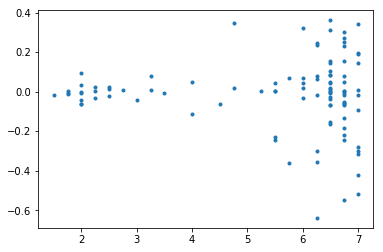

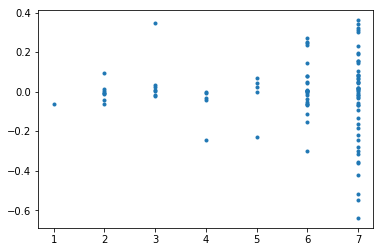

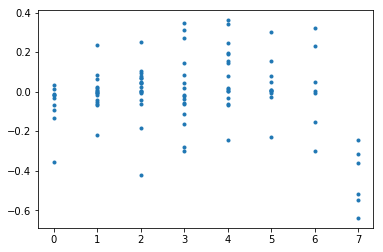

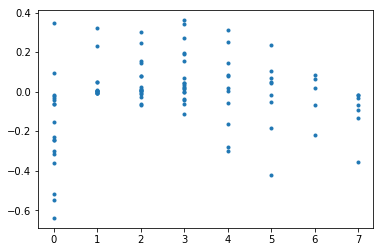

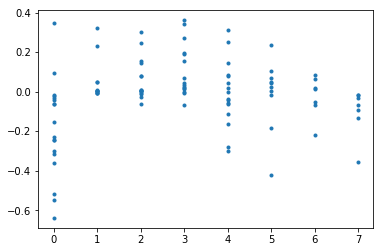

In [5]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
np.mean(improvement), np.std(improvement)


fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(descendants,improvement, '.')
plt.show()

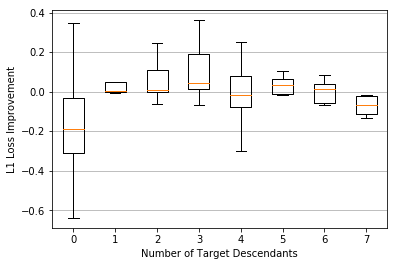

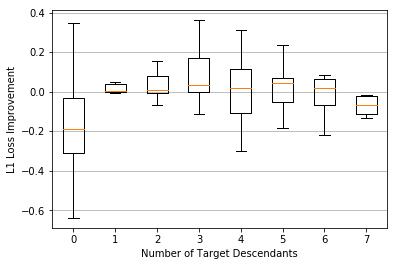

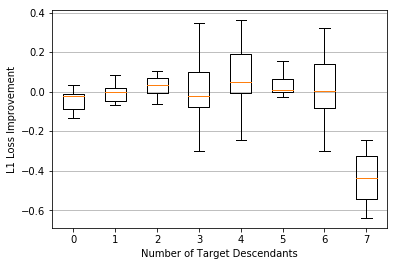

In [6]:
def box_plots(X,Y):
    box = []
    for i in np.unique(X):
        box.append([])
    for x,y in zip(X, Y):
        box[x].append(y)
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Target Descendants")
    ax.set_ylabel("L1 Loss Improvement")
    bp = ax.boxplot(box, showfliers=False, labels = ['0', '1', '2', '3', '4', '5', '6', '7'])
    
box_plots(descendants, improvement)
box_plots(target_outD, improvement)
box_plots(target_inD, improvement)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

In [ ]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))